# Bloque II: Time-series analysis (8 horas)

0 Time-series basic handling

1 Time-series models: AR, MA, ARMA, state-space models (2 horas)

2 Simulation of time-series models (1 hora)

3 Time-series characterization: ACF & Spectral analysis (2 horas)

4 Model identification (1 hora)

5 Analysis of non-stationary, non-linear time-series (2 horas)
    5.1 Shannon entropy and mutual information
    5.2 Surrogate data analysis


In [2]:
np.random.seed(13)

NameError: name 'np' is not defined

# 0. Time-series basic handling

## Read time series data from excel:

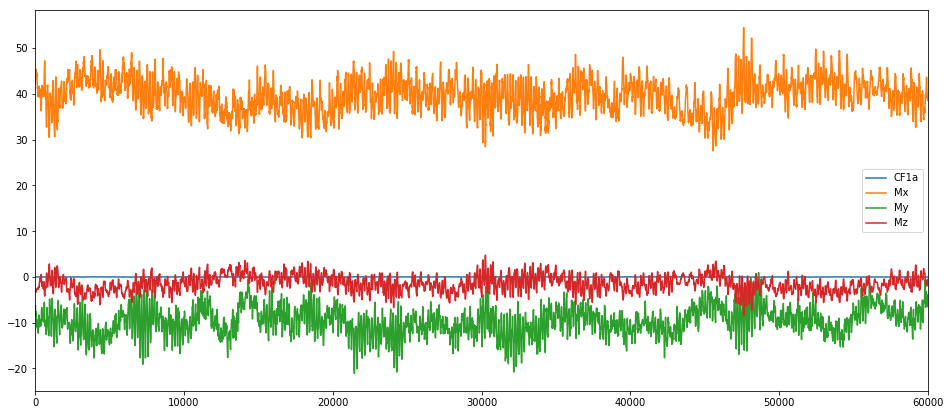

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('struct_data.txt', sep="\t", header=0)
data.columns = ["CF1a", "Mx", "My", "Mz"]
data.plot(figsize=(16,7))
plt.show()

In [776]:
print(data.shape)
print(data.dtypes)

(60000, 4)
CF1a    float64
Mx      float64
My      float64
Mz      float64
dtype: object


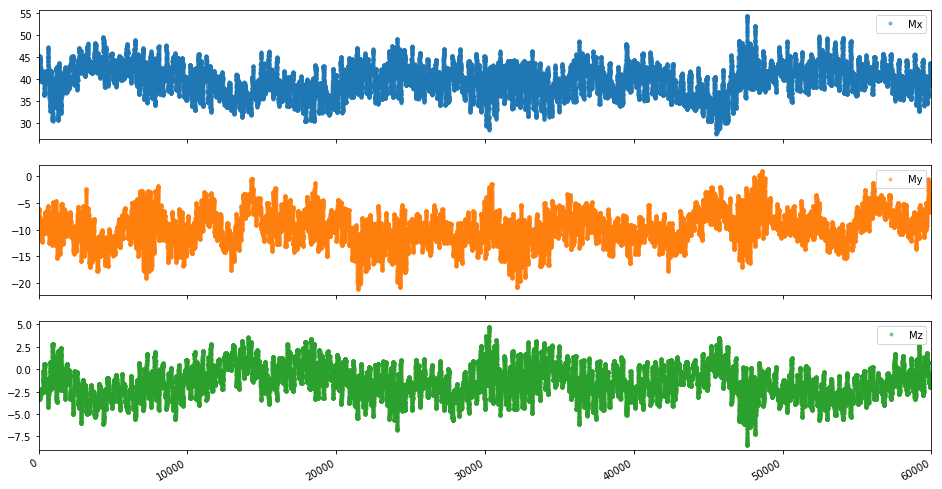

In [5]:
cols_plot = ['Mx', 'My', 'Mz']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 9), subplots=True)

## Scaling time-series

### Standardization
# $\hat{x} = \frac{x-\bar{x}}{\sigma_x}$

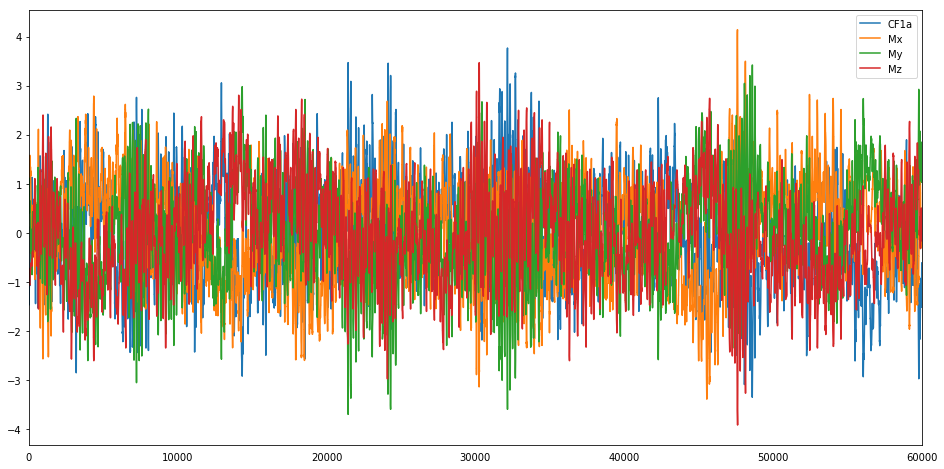

,CF1a,Mx,My,Mz
0,-1.334474,0.684331,0.945860,-0.728632
1,-1.355631,0.684331,0.973987,-0.777263
2,-1.385604,0.684331,0.992738,-0.777263
3,-1.420869,0.732691,1.011489,-0.809683
4,-1.449080,0.732691,1.011489,-0.809683


In [834]:
from sklearn import preprocessing
dscal1 = scale(data)
data_scaled = pd.DataFrame(dscal1,columns = ["CF1a", "Mx", "My", "Mz"])
data_scaled.plot(figsize=(16,8))
plt.show()
data_scaled.head()

### Normalization 

# $\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$

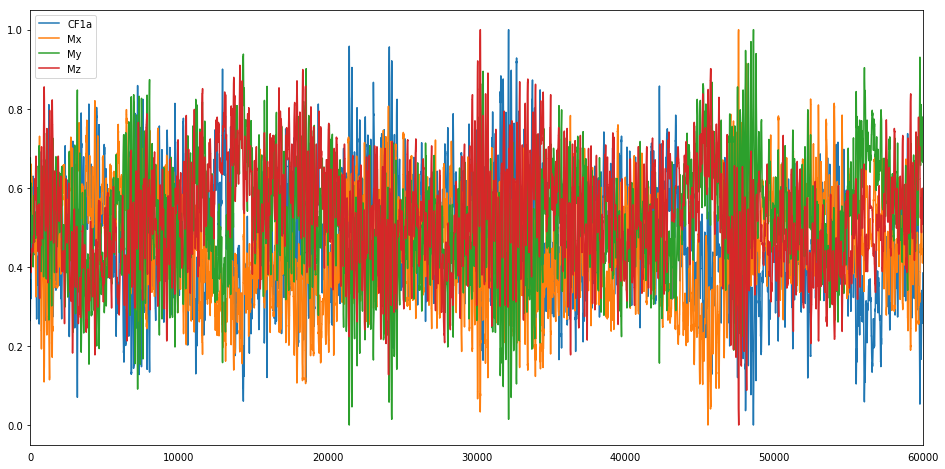

,CF1a,Mx,My,Mz
0,0.283663,0.541177,0.652632,0.432018
1,0.280693,0.541177,0.656579,0.425439
2,0.276485,0.541177,0.659210,0.425439
3,0.271535,0.547594,0.661842,0.421053
4,0.267574,0.547594,0.661842,0.421053


In [835]:
min_max_scaler = MinMaxScaler()
dscal2 = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(dscal2,columns = ["CF1a", "Mx", "My", "Mz"])
data_norm.plot(figsize=(16,8))
plt.show()
data_norm.head()

### Scale data to specified range (min,max):

## $x_{scaled} = \tilde{x}(\text{max}-\text{min})+\text{min}$

where 

## $\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$

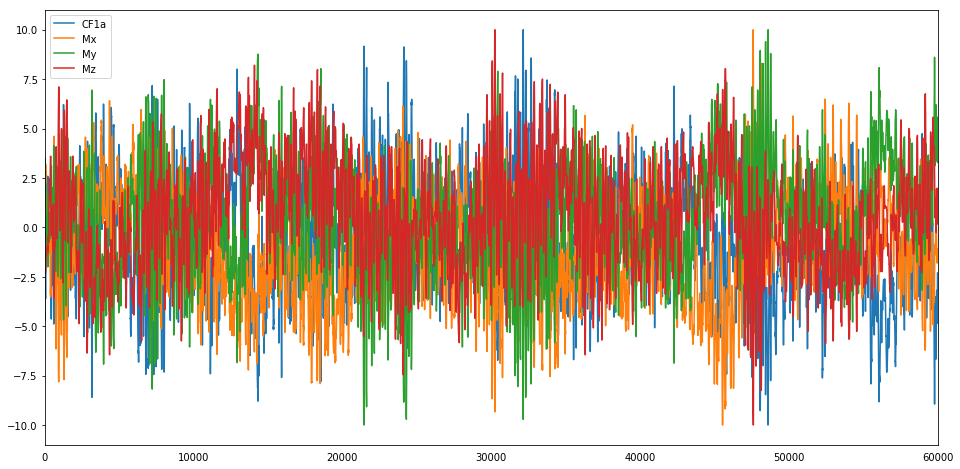

In [836]:
min_max_scaler2 = MinMaxScaler(feature_range=(-10, 10))
dscal3 = min_max_scaler2.fit_transform(data)
data_scal1 = pd.DataFrame(dscal3,columns = ["CF1a", "Mx", "My", "Mz"])
data_scal1.plot(figsize=(16,8))
plt.show()

### Scale data to range [-1,1]:

Scaled data lies within the range [-1, 1] by dividing through the largest maximum value in each time-series

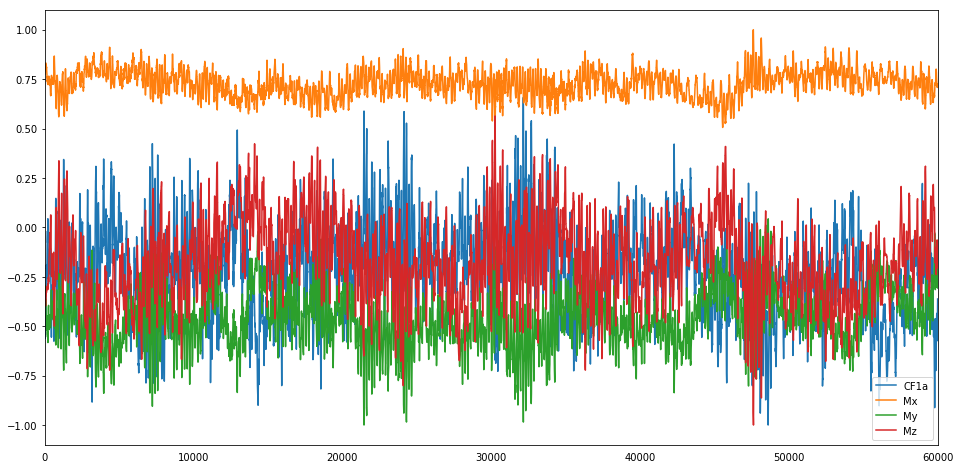

In [837]:
max_abs_scaler = preprocessing.MaxAbsScaler()
dscal4 = max_abs_scaler.fit_transform(data)
data_scal2 = pd.DataFrame(dscal4,columns = ["CF1a", "Mx", "My", "Mz"])
data_scal2.plot(figsize=(16,8))
plt.show()

## Dealing with date and timestamps: The Pandas Timestamp 

In [782]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [783]:
pd.to_datetime(['4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])

DatetimeIndex(['2015-07-04', '2015-07-06', '2015-07-07', '2015-07-08'], dtype='datetime64[ns]', freq=None)

In [784]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

Generate a sequence of timestamps: 

Frequency codes:

D	Calendar day	
W	Weekly		
M	Month end	
Q	Quarter end	
A	Year end	
H	Hours	
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds

In [785]:
pd.date_range('2019-07-18', periods=10, freq='H')

DatetimeIndex(['2019-07-18 00:00:00', '2019-07-18 01:00:00',
               '2019-07-18 02:00:00', '2019-07-18 03:00:00',
               '2019-07-18 04:00:00', '2019-07-18 05:00:00',
               '2019-07-18 06:00:00', '2019-07-18 07:00:00',
               '2019-07-18 08:00:00', '2019-07-18 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [786]:
pd.date_range('2019-07-18', periods=10, freq='M')

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', freq='M')

Assign a certain sequence to a previously loaded dataframe

In [787]:
data.index = pd.date_range('2010-07-18', periods=data.shape[0], freq='T')

In [788]:
data.tail()


,CF1a,Mx,My,Mz
2010-08-28 15:55:00,-0.029145,39.40959,-6.068361,-1.691354
2010-08-28 15:56:00,-0.028443,39.32320,-6.300058,-1.691354
2010-08-28 15:57:00,-0.028108,39.29440,-6.329020,-1.691354
2010-08-28 15:58:00,-0.027589,39.29440,-6.415906,-1.691354
2010-08-28 15:59:00,-0.026948,39.29440,-6.473830,-1.720160


You can construct consistent datetime index from different columns:

#import wget
#from urllib3 import urlretrieve
#urlretrieve("ftp://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat", "kk.gz")
#!wget ftp://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat

- columns 1, 2, 3 giving the year, day of year (DOY), and hour of day of each measurement
- column 40: the sunspot number (R) - the number of spots on the surface of the Sun, indicating how active it is
- column 41: the Dst index - an hourly magnetic activity index measured at Earth’s surface, in nT
- column 51: the F10.7 index - the radio flux at 10.7cm (i.e. how bright the Sun is at that wavelength), in “solar flux units” (sfu)
    

In [789]:
df = pd.read_csv("omni2_all_years.dat",delim_whitespace=True,usecols=[0, 1, 2, 39, 40, 50],names=["Year", "DOY", "Hour", "R", "Dst", "F10.7"])
df.head()

,Year,DOY,Hour,R,Dst,F10.7
0,1963,1,0,33,-6,999.9
1,1963,1,1,33,-5,999.9
2,1963,1,2,33,-5,999.9
3,1963,1,3,33,-3,999.9
4,1963,1,4,33,-3,999.9


In [790]:
df.index = pd.to_datetime(df["Year"] * 100000 + df["DOY"] * 100 + df["Hour"], format="%Y%j%H")
df = df.drop(columns=["Year", "DOY", "Hour"])
df.head()

,R,Dst,F10.7
1963-01-01 00:00:00,33,-6,999.9
1963-01-01 01:00:00,33,-5,999.9
1963-01-01 02:00:00,33,-5,999.9
1963-01-01 03:00:00,33,-3,999.9
1963-01-01 04:00:00,33,-3,999.9


## Resampling, moving averages and differencing

**Resampling a time series: Moving average, Downsampling, Smoothing:**

Sampling was every minute and we want to smooth/downsample at every two days by median filtering


In [791]:
data_smoothed = data[["Mx", "My"]].resample("2d").median()
data_smoothed.head()

,Mx,My
2010-07-18,40.33108,-9.645176
2010-07-20,42.57722,-12.237280
2010-07-22,41.71332,-8.559099
2010-07-24,40.28789,-9.775506
2010-07-26,36.44353,-9.659657


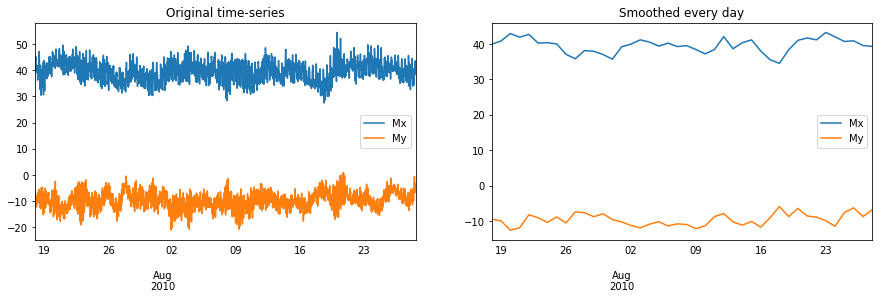

In [792]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(121)
data[["Mx", "My"]].plot(figsize=(15,4),ax=ax1)
ax1.set_title("Original time-series")

ax2 = fig.add_subplot(122)
data[["Mx", "My"]].resample("1d").median().plot(figsize=(15,4),ax=ax2)
ax2.set_title("Smoothed every day")
plt.show()

In [793]:
data['Mxs'] = data[["Mx"]].resample("1d").median()
data.head()

,CF1a,Mx,My,Mz,Mxs
2010-07-18 00:00:00,-0.039399,42.08768,-6.734489,-2.728385,39.95673
2010-07-18 00:01:00,-0.039766,42.08768,-6.647603,-2.814805,NaN
2010-07-18 00:02:00,-0.040284,42.08768,-6.589679,-2.814805,NaN
2010-07-18 00:03:00,-0.040895,42.26046,-6.531754,-2.872417,NaN
2010-07-18 00:04:00,-0.041383,42.26046,-6.531754,-2.872417,NaN


In [794]:
data = data.drop(columns=["Mxs"])
data.head()

,CF1a,Mx,My,Mz
2010-07-18 00:00:00,-0.039399,42.08768,-6.734489,-2.728385
2010-07-18 00:01:00,-0.039766,42.08768,-6.647603,-2.814805
2010-07-18 00:02:00,-0.040284,42.08768,-6.589679,-2.814805
2010-07-18 00:03:00,-0.040895,42.26046,-6.531754,-2.872417
2010-07-18 00:04:00,-0.041383,42.26046,-6.531754,-2.872417


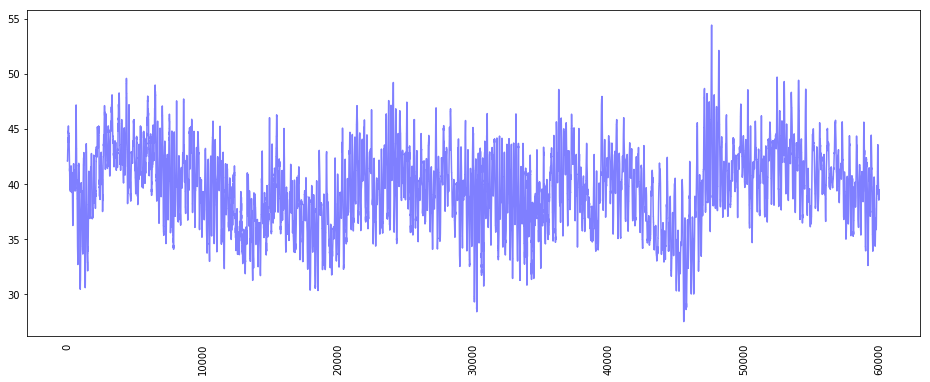

In [838]:
fig = plt.figure(figsize=(16, 6))
plt.plot(data.index.values, data['Mx'], alpha=0.5, color = 'blue')
plt.xticks(rotation='vertical')
plt.show()

**Differencing a time-series:**

$\Delta y = y_t - y_{t-1}$

In [796]:
data_diff = data.diff()
data_diff.head()

,CF1a,Mx,My,Mz
2010-07-18 00:00:00,NaN,NaN,NaN,NaN
2010-07-18 00:01:00,-0.000366,0.00000,0.086886,-0.086420
2010-07-18 00:02:00,-0.000519,0.00000,0.057924,0.000000
2010-07-18 00:03:00,-0.000610,0.17278,0.057925,-0.057612
2010-07-18 00:04:00,-0.000488,0.00000,0.000000,0.000000


**Detrending the time-series:**

Dealing with missing values in time-series:

-Backward Fill

-Linear Interpolation

-Quadratic interpolation

-Mean of nearest neighbors

-Mean of seasonal couterparts

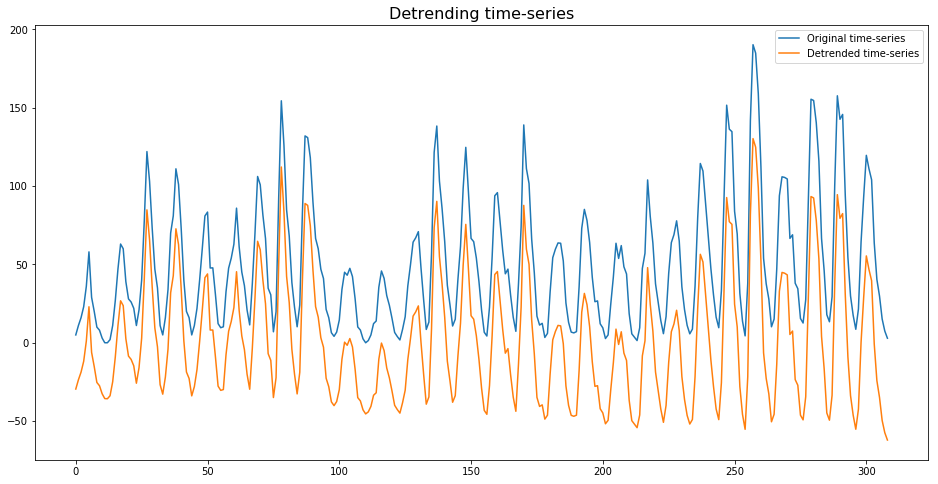

In [10]:
# Using scipy: Subtract the line of best fit
from scipy import signal
import statsmodels.api as sm

dta = sm.datasets.sunspots.load_pandas().data

detrended = signal.detrend(dta["SUNACTIVITY"].values)
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(dta["SUNACTIVITY"].values,label='Original time-series')
ax.plot(detrended,label='Detrended time-series')
ax.legend()
plt.title('Detrending time-series', fontsize=16)
plt.show()

Randomly place some NaNs in the series

In [858]:
dta_missing = dta.copy()
places = np.random.randint(dta.shape[0], size=10)
# since index are dates, add a column with the onservation number
dta_missing['OBS'] = np.arange(dta.shape[0])
for k in places:
    print(k)
    dta_missing.loc[dta_missing['OBS']==k,'SUNACTIVITY'] = np.nan

272
75
55
233
213
61
205
240
97
58


Replace Nans by propagating last valid observation forward to to fill the missing observation:

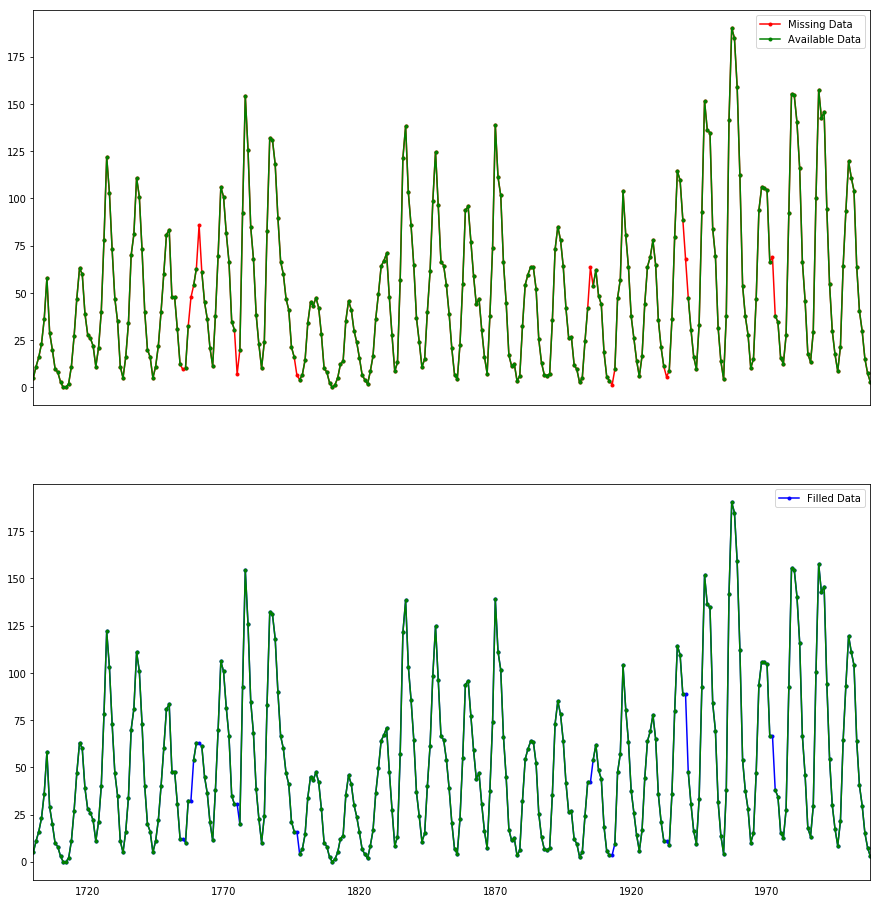

In [859]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 16))
dta["SUNACTIVITY"].plot(x="YEAR",ax=axes[0], color='red', style=".-")
dta_missing["SUNACTIVITY"].plot(x="YEAR",ax=axes[0], color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

dta_filled = dta_missing.fillna(method='pad', limit=10)
dta_filled["SUNACTIVITY"].plot(x="YEAR",ax=axes[1], color='blue', style=".-")
dta_missing["SUNACTIVITY"].plot(x="YEAR",ax=axes[1], color='green', style=".-")
axes[1].legend(["Filled Data"])
plt.show()

Imputation mean squared error:

In [860]:
from sklearn.metrics import mean_squared_error
error = np.round(mean_squared_error(dta["SUNACTIVITY"], dta_filled["SUNACTIVITY"]), 2)
print('MSE = {}'.format(error))

MSE = 7.63


Compare MSE against 3rd order polynomial interpolation (splines):

In [861]:
dta_filled1 = dta_missing.interpolate(method='spline', order=2)
error1 = np.round(mean_squared_error(dta["SUNACTIVITY"], dta_filled1["SUNACTIVITY"]), 2)
print('MSE = {}'.format(error1))

MSE = 19.47


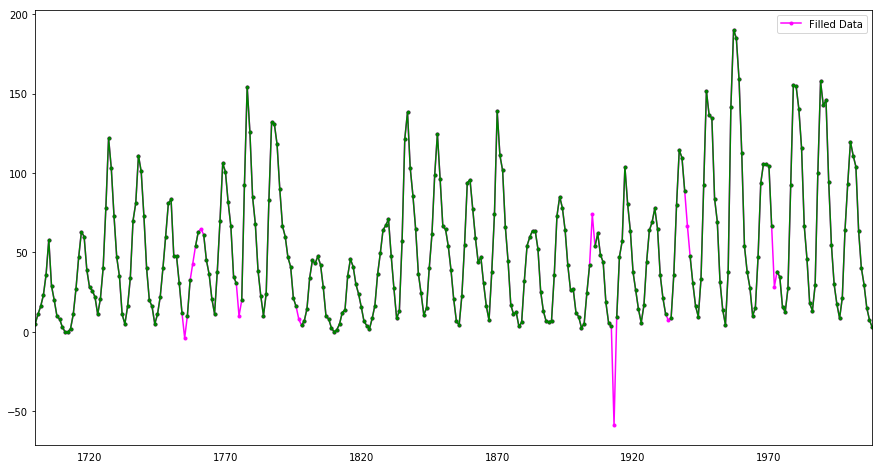

In [862]:
plt.figure(figsize=(15,8));
dta_filled = dta_missing.fillna(method='pad', limit=10)
dta_filled1["SUNACTIVITY"].plot(x="YEAR", color='magenta', style=".-")
dta_missing["SUNACTIVITY"].plot(x="YEAR", color='green', style=".-")
plt.legend(["Filled Data"])
plt.show()

Find peaks in signals:

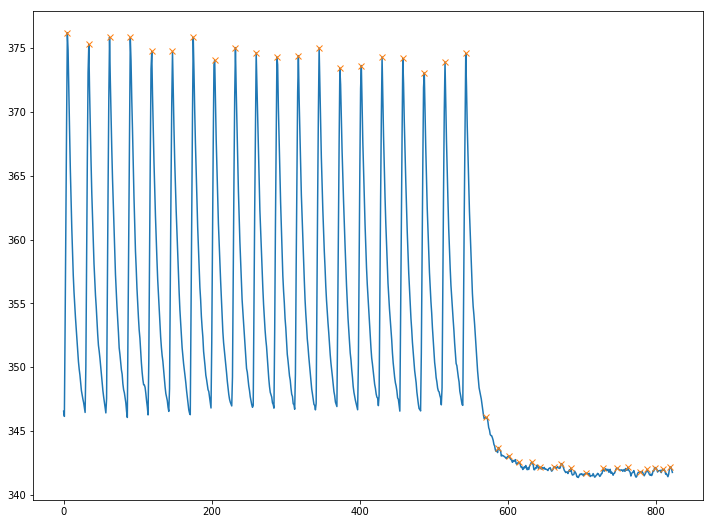

In [6]:
import scipy.io
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import pylab as plt

data = pd.read_csv('signal.txt', sep="\t", header=0)
x=data.values.squeeze()
peaks, _ = find_peaks(x, distance=10)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
plt.plot(data.values)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [7]:
peaks

array([  5,  34,  62,  90, 119, 147, 175, 204, 232, 260, 288, 317, 345,
       373, 402, 430, 458, 487, 515, 543, 570, 587, 602, 615, 632, 643,
       662, 672, 685, 706, 729, 747, 762, 778, 788, 798, 809, 819])

# 1. Time series models: AR, MA, ARMA, state-space

## 1.1 Autoregressive models 

Estimation of AR model parameters in univariate Autogressive Processes

In [30]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

dta = sm.datasets.sunspots.load_pandas().data
dta.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [31]:
dta.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [32]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [33]:
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


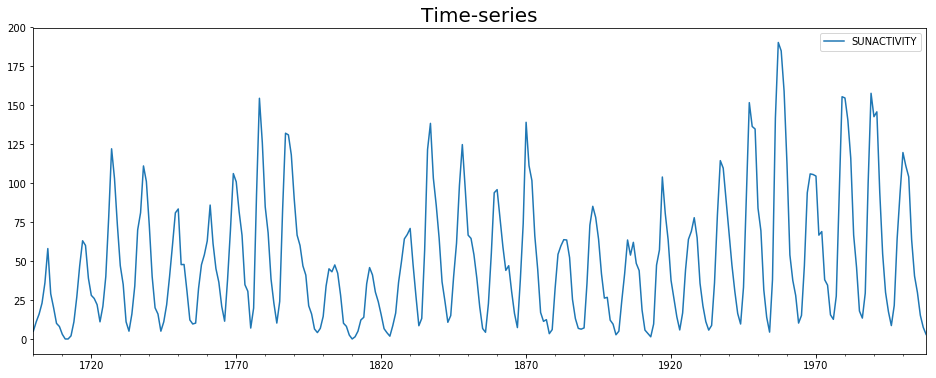

In [34]:
dta.plot(figsize=(16,6));
plt.title('Time-series',fontsize=20)
plt.show()

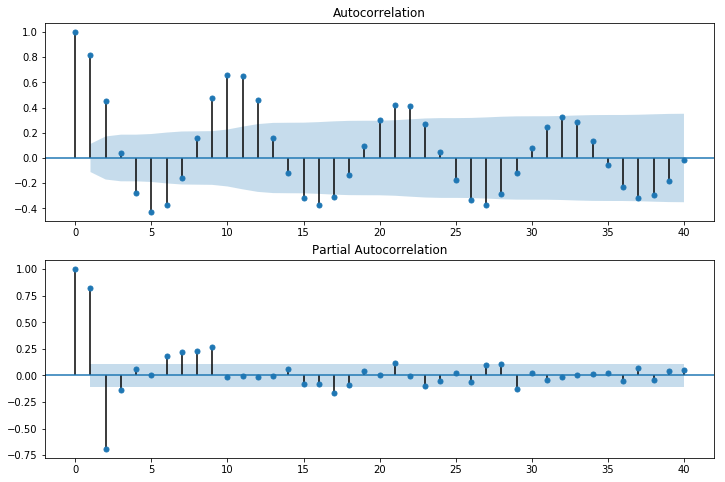

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

**Fit an AR(2) model to data:**

In [36]:
ar2_mod = sm.tsa.ARMA(dta, (2,0))
ar2_results = ar2_mod.fit()
ar2_results.summary()

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 0)   Log Likelihood               -1307.318
Method:                       css-mle   S.D. of innovations             16.576
Date:                Tue, 16 Jul 2019   AIC                           2622.636
Time:                        12:30:27   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.6593      3.165     15.689      0.000      43.456      55.863
ar.L1.SUNACTIVITY     1.3907      0.041     33.954      0.000       1.310       1.471
ar.L2.SUNACTIVITY    -0.6886      0.041    -16.803      0.000      -0.769      -0.608
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0098           -0.6577j            1.2051           -0.0919
AR.2            1.0098           +0.6577j            1.2051            0.0919
-----------------------------------------------------------------------------
"""

**Checking normality of the residuals:**

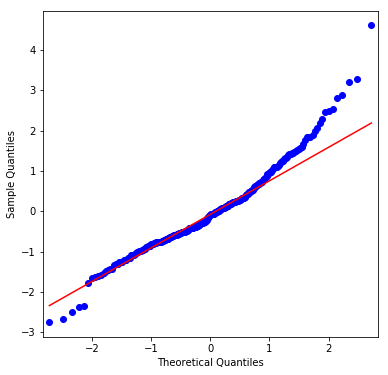

In [38]:
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
fig = qqplot(ar2_results.resid, line='q', ax=ax, fit=True)

**Checking and testing non-stationarity of the time-series:**

Unit Root test:

- Augmented Dickey Fuller test (ADH Test): ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

In [851]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(dta["SUNACTIVITY"].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.837780724938198
p-value: 0.05307642172812019


**Testing for trend stationarity: Kwiatkowski-Phillips-Schmidt-Shin – KPSS test **

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. Now the null hypothesis that x is level or trend stationary. The below code implements these two tests using statsmodels package in python.

In [852]:
from statsmodels.tsa.stattools import kpss
result = kpss(dta["SUNACTIVITY"].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])


KPSS Statistic: 0.446646
p-value: 0.057049


**Forecasting**

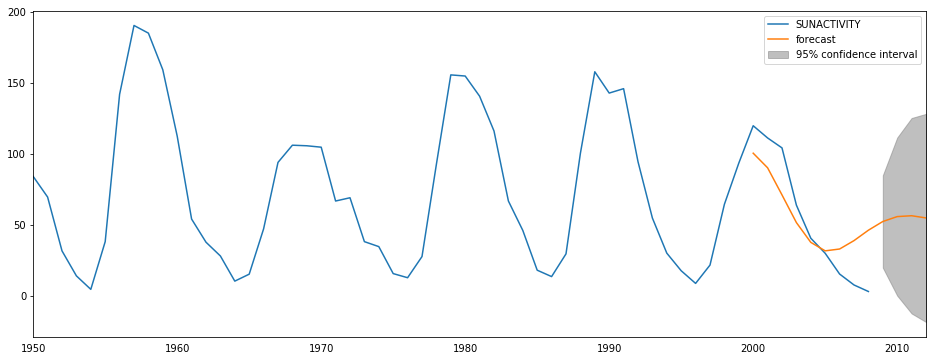

In [854]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = dta.loc['1950':].plot(ax=ax)
fig = ar2_mod.plot_predict('2000', '2012', dynamic=True, ax=ax, plot_insample=False)

Forecasting error:

In [855]:
predict_sunspots = ar2_mod.predict('2000', '2012', dynamic=True)
error = (predict_sunspots - dta.SUNACTIVITY)**2
mse = error.mean()/dta.mean()
print(mse)

SUNACTIVITY    11.659007
dtype: float64


# 2. Simulation ot time-series models: 

Generation of artificial time-series data 


## Simulation of stochastic processes:

General structure of time-series models: 
Time-series models are generally described in terms of a stochastic difference equation:
\begin{equation*}
y_t = -a_1 y_{t-1} -a_2 y_{t-2} - \dots -a_n y_{t-n} + b_0 x_n + b_1 x_{t-1} + \dots + b_m x_{t-m}+ \varepsilon_t, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

in which the input $x_t$ is a stochastic process. There are three basic architectures: 

- Autoregressive models (AR models)
- Moving average models (MA models)
- Mixed autoregressive moving-average models (ARMA models)

**Autoregressive models (AR models):**

We define an autoregressive process of prder $p$ or AR(p) model for $y_t$ as: 

\begin{equation*}
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

The current value $y_t$ is a linear combination of the $p$ most recent past values of the time series. The noise term $\varepsilon_t$ is called innovation and is a stochastic term that includes everything not explained by the past values (measurement error, for instance). 

**Moving Average models (MA):** 

We define a moving average process of order $q$} or MA(q) model for $y_t$ as: 

\begin{equation*}
y_t = \varepsilon_t - \theta_1 \varepsilon_{t-1} - \dots - \theta_q \varepsilon_{t-q}, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

This process is a moving average of order q of the past noise values. It behaves as a {\bf low-pass filter of the noise}. In digital signal processing, it is equivalent to a low-pass {\bf Finite Impulse Response Filter} (low-pass FIR filter) with a gaussian white noise input.

**Mixed autoregressive moving-average models (ARMA models):**

We define an {\bf autoregressive moving average process of order $(p,q)$} or ARMA(p,q) model for $y_t$ as: 

\begin{equation*}
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t - \theta_1 \varepsilon_{t-1} - \dots - \theta_q \varepsilon_{t-q}, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

In digital signal processing, it is equivalent to an Infinite Impulse Response filter (IIR filter) with a gaussian white noise input.


### The Gaussian process: 

The simplest model is the **constant mean process** (Gaussian Noise term only): 

We measure an unknown value $\mu$ using a noisy instrument with precission $\sigma$ and correctly callibrated (zero mean, no bias, perfect accuracy):  


\begin{equation*}
y_t = \mu + \varepsilon_t, t=1,\dots,n , \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}


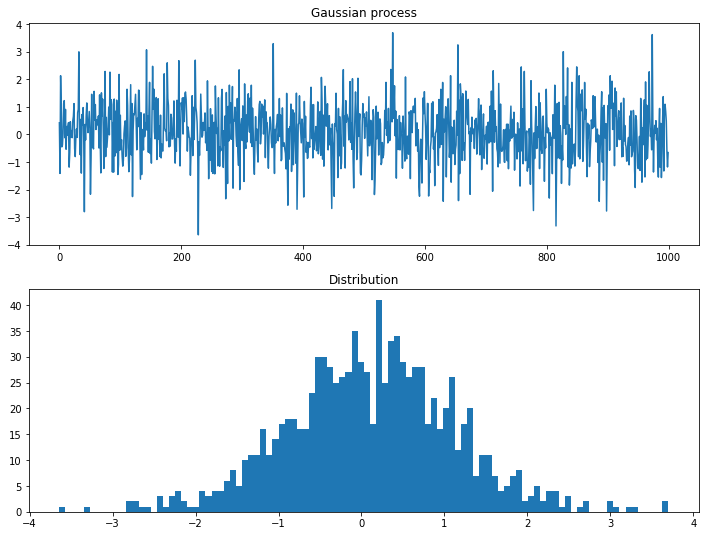

In [40]:
n = 1000
mu = 0.1
sig2 = 1.0
sig = np.sqrt(sig2)
y = np.random.normal(mu, sig, n)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(211)
plt.plot(y)
ax.set_title("Gaussian process")
ax1 = fig.add_subplot(212)
plt.hist(y,100)
ax1.set_title("Distribution")
plt.show()

### Simulation of AR(p) models:


**Example: AR(1) model:**

$y_t = \rho y_{t-1} + \varepsilon_t,   t=1,\dots,n$.

For $\rho=1$ we have the **Random Walk** model

Direct simulation of the stochastic process:

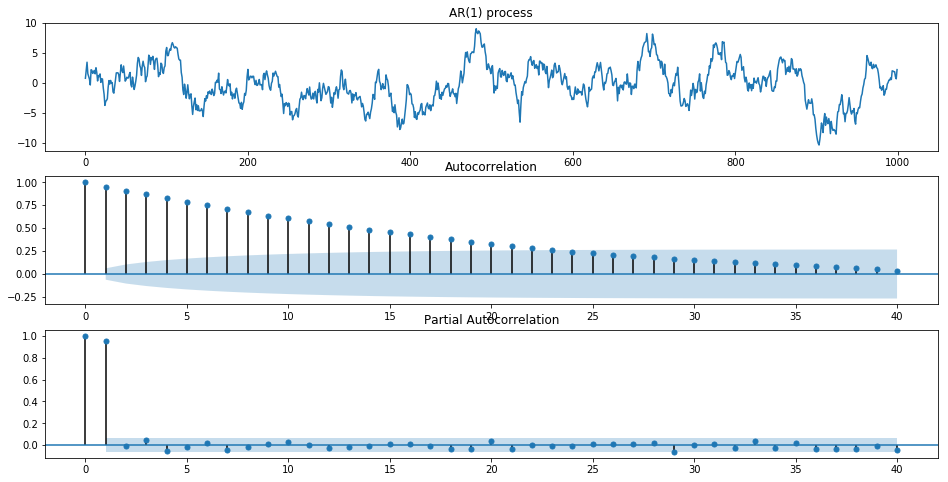

In [44]:
n = 1000
y0 = 0.0
rho = 0.95
sig2 = 1.0
sig = np.sqrt(sig2)

y = np.zeros(n)
y[0] = np.random.normal(rho*y0, sig, 1)
for t in np.arange(1,n):
    y[t] = np.random.normal(rho*y[t-1], sig, 1)


fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(311)
plt.plot(y)
plt.title('AR(1) process')
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax2)
ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax3)
plt.show()


In [42]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Simulation of AR(1) model with trend:**

$y_t = \mu + \rho y_{t-1} + \varepsilon_t,   t=1,\dots,n$:

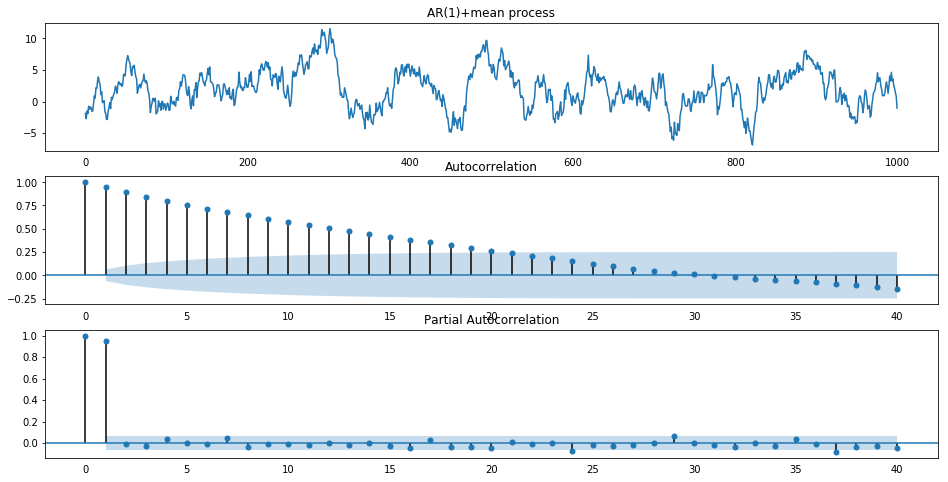

In [1054]:
n = 1000
y0 = 0.0
mu = 0.1
rho = 0.95
sig2 = 1.0
sig = np.sqrt(sig2)
y[0] = np.random.normal(mu+rho*y0, sig, 1)
for t in np.arange(n-1):
    y[t] = np.random.normal(mu+rho*y[t-1], sig, 1)


fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(311)
plt.plot(y)
plt.title('AR(1)+mean process')
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax2)
ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax3)
plt.show()

**Simulation of an ARMA(p,q) process** using statsmodels libraries:

The ARMA(p,q) process is normally described by

\begin{equation*}
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t - \theta_1 \varepsilon_{t-1} - \dots - \theta_q \varepsilon_{t-q}, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

but the parameterization used in **the statsmodels libraries uses the lag-polynomial representation**:

\begin{equation*}
(1-\phi_1 L- \dots -\phi_p L_p) y_t = (1-\theta_1 L - \dots - \theta_q L_q)
\end{equation*}


where $L_k$ represents the k-th lag operator corresponding to a definition of the ARMA(p,q) model with additive terms at the right-term-side of the equation: 

\begin{equation*}
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

## IMPORTANT!: In practice, when we want to specify an ARMA(p,q) model with parameters $\phi_1, \dots , \phi_p$ and $\theta_1,\dots, \theta_q$ we specify the polynomials $\left[1,-\phi_1,-\phi_2, \dots \right]$ and $\left[1,-\theta_1,-\theta_2, \dots \right]$


\begin{equation*}
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t - \theta_1 \varepsilon_{t-1} - \dots - \theta_q \varepsilon_{t-q}, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}


In the following example we have $p=4$ and $q=1$ and the parameters are given by 
$\phi_1 = 0.35, \phi_2 = -0.15 ,\phi_3 = 0.55, \phi_4 =0.1, \theta_1 = 0.65$

In [1382]:
from statsmodels.tsa.arima_process import ArmaProcess
arparams = np.array([1, -.35, .15, -.55, -.1])
maparams = np.array([1, -.65])
arma_t = ArmaProcess(arparams, maparams)

In [1383]:
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)

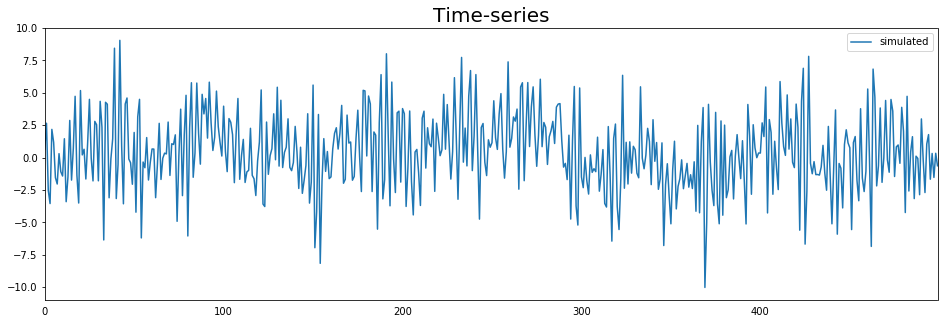

In [1384]:
df = pd.DataFrame(arma_rvs,columns=['simulated'])
df.plot(figsize=(16,5));
plt.title('Time-series',fontsize=20)
plt.show()

For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags.

The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

In our case, p = 4 and q = 1 so p-q = 3

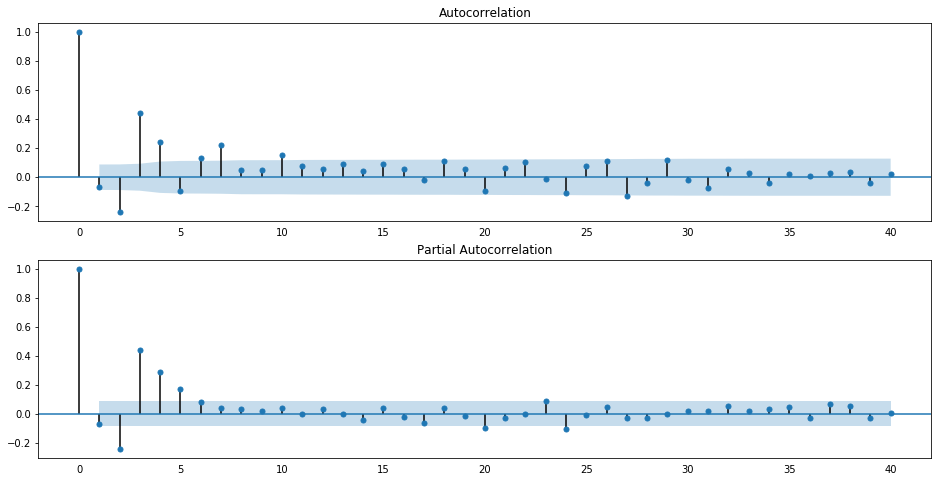

In [1385]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

### State-space models:

Observation equation: 
\begin{equation*}
y_t = F_t \theta_t + v_t, \, v_t \sim N(0,\sigma_y^2) 
\end{equation*}
State dynamics:
\begin{equation*}
\theta_t = G_t \theta_{t-1} + w_t, \, w_t \sim N(0,\sigma_\theta^2)
\end{equation*}


**Simulation of state-space models: Local level model**


The local level model is a state-space model with $F_t=1$ and $G_t=1$: 

\begin{eqnarray*}
y_t &=& \theta_t + v_t, \, v_t \sim N(0,\sigma_y^2) \\
\theta_t &=&  \theta_{t-1} + w_t, \, w_t \sim N(0,\sigma_\theta^2)
\end{eqnarray*}

Direct simulation from the equations:

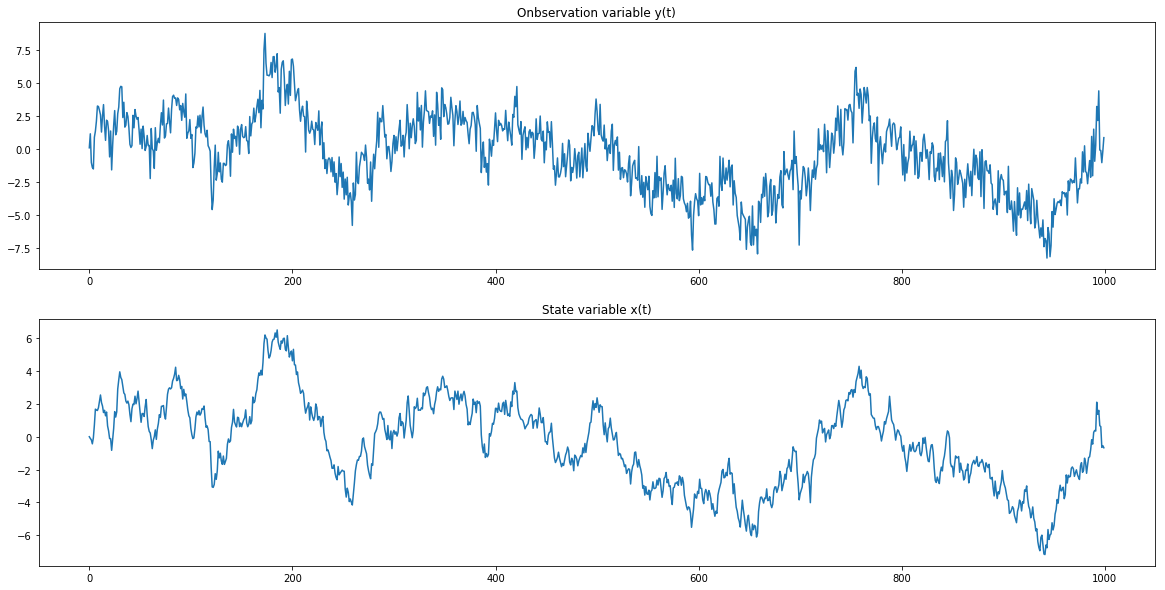

In [45]:
n = 1000
sig2 = 1.0
sig = np.sqrt(sig2)
tau2 = 0.25
tau = np.sqrt(tau2)
x = np.zeros(n)
y = np.zeros(n)
y[0] = x[0]+np.random.normal(0, sig, 1)
for t in np.arange(1,n):
    x[t] = x[t-1] + np.random.normal(0, tau, 1)
    y[t] = x[t] + np.random.normal(0, sig, 1)

    

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax.plot(y)
plt.title("Onbservation variable y(t)")
ax1 = fig.add_subplot(212)
ax1.plot(x)
plt.title("State variable x(t)")
plt.show()



**Estimation of state-space models using statsmodel libraries:**

The state-space model is written with observation and state intercepts $d_t$ and $c_t$ as follows:
    
\begin{equation*}
y_t = Z_t \alpha_t + d_t + \varepsilon_t, \, v_t \sim N(0,\sigma_y^2) 
\end{equation*}
\begin{equation*}
\alpha_t = T_t \alpha_{t-1} + c_t + R_t \eta_t, \, w_t \sim N(0,\sigma_\theta^2)
\end{equation*}
    
    
where $y_t$ refers to the observation vector at time 𝑡, $\alpha_t$ refers to the (unobserved) state vector at time 𝑡, and where the irregular components are defined as

\begin{eqnarray*}
\varepsilon_t \sim N(0,H_t) \\
\eta_t \sim N(0,Q_t)
\end{eqnarray*}



The remaining variables $𝑍_𝑡,𝑑_𝑡,𝐻_𝑡,𝑇_𝑡,𝑐_𝑡,𝑅_𝑡,𝑄_𝑡$ in the equations are matrices describing the process. Their variable names and dimensions are as follows

Z : design (𝑘_𝑒𝑛𝑑𝑜𝑔×𝑘_𝑠𝑡𝑎𝑡𝑒𝑠×𝑛𝑜𝑏𝑠)

d : obs_intercept (𝑘_𝑒𝑛𝑑𝑜𝑔×𝑛𝑜𝑏𝑠)

H : obs_cov (𝑘_𝑒𝑛𝑑𝑜𝑔×𝑘_𝑒𝑛𝑑𝑜𝑔×𝑛𝑜𝑏𝑠)

T : transition (𝑘_𝑠𝑡𝑎𝑡𝑒𝑠×𝑘_𝑠𝑡𝑎𝑡𝑒𝑠×𝑛𝑜𝑏𝑠)

c : state_intercept (𝑘_𝑠𝑡𝑎𝑡𝑒𝑠×𝑛𝑜𝑏𝑠)

R : selection (𝑘_𝑠𝑡𝑎𝑡𝑒𝑠×𝑘_𝑝𝑜𝑠𝑑𝑒𝑓×𝑛𝑜𝑏𝑠)

Q : state_cov (𝑘_𝑝𝑜𝑠𝑑𝑒𝑓×𝑘_𝑝𝑜𝑠𝑑𝑒𝑓×𝑛𝑜𝑏𝑠)

In the case that one of the matrices is time-invariant (so that, for example, 𝑍𝑡=𝑍𝑡+1 ∀ 𝑡), its last dimension may be of size 1 rather than size nobs.

This generic form encapsulates many of the most popular linear time series models (see below) and is very flexible, allowing estimation with missing observations, forecasting, impulse response functions, and much more.

Example: Estimation of an AR(2) process in state-space form:

\begin{equation*}
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t, \, \varepsilon_t \sim N(0,\sigma^2)
\end{equation*}

This can be put into state space form in the following way:

\begin{eqnarray*}
y_t = \left[ {\begin{array}{cc}
   1 & 0 \\
  \end{array} } \right] \cdot \alpha_t \\
\alpha_t = \left[ {\begin{array}{cc}
   \phi_1 & \phi_2 \\
   1 & 0 \\
  \end{array} } \right] \alpha_{t-1} + \left[ {\begin{array}{c}
   1 \\
   0 \\
  \end{array} } \right] \eta_t, \eta_t \sim N(0,\sigma^2)
\end{eqnarray*}

In [1387]:
import numpy as np
from scipy.signal import lfilter
import statsmodels.api as sm

# True model parameters
nobs = int(1e3)
true_phi = np.r_[0.5, -0.2] # concatenate as row-vector
true_sigma = 1**0.5

# Simulate a time series by direct filter convolution:
np.random.seed(1234)
disturbances = np.random.normal(0, true_sigma, size=(nobs,))
endog = lfilter([1], np.r_[1, -true_phi], disturbances)

# Construct the model
class AR2(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Initialize the state space model
        super(AR2, self).__init__(endog, k_states=2, k_posdef=1,
                                  initialization='stationary')

        # Setup the fixed components of the state space representation
        self['design'] = [1, 0] # This is the Z_t matrix
        self['transition'] = [[0, 0],
                                  [1, 0]] # This is the T_t matrix
        self['selection', 0, 0] = 1

    # Describe how parameters enter the model
    def update(self, params, transformed=True, **kwargs):
        params = super(AR2, self).update(params, transformed, **kwargs)

        self['transition', 0, :] = params[:2]
        self['state_cov', 0, 0] = params[2]

    # Specify start parameters and parameter names
    @property
    def start_params(self):
        return [0,0,1]  # these are very simple

# Create and fit the model
mod = AR2(endog)
res = mod.fit()
print(res.summary())


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                            AR2   Log Likelihood               -1389.437
Date:                Fri, 05 Jul 2019   AIC                           2784.874
Time:                        17:05:07   BIC                           2799.598
Sample:                             0   HQIC                          2790.470
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
param.0        0.4395      0.030     14.730      0.000       0.381       0.498
param.1       -0.2055      0.032     -6.523      0.000      -0.267      -0.144
param.2        0.9425      0.042     22.413      0.0

Compare true and estimated parameters:

In [1388]:
print('true (phi1,phi2) = ({},{})'.format(*true_phi))
print('estimated (phi1,phi2) = ({},{})'.format(res.params[0],res.params[1]))

print('true sigma = {}'.format(true_sigma))
print('estimated sigma = {}'.format(res.params[2]))

true (phi1,phi2) = (0.5,-0.2)
estimated (phi1,phi2) = (0.4395059844531,-0.20552396573013537)
true sigma = 1.0
estimated sigma = 0.9424835646880493


**Example: The local level model**

We first define the model using Statsmodels' state space library:

In [1389]:
class LocalLevel(sm.tsa.statespace.MLEModel):
    _start_params = [1., 1.]
    _param_names = ['var.level', 'var.irregular']

    def __init__(self, endog):
        super(LocalLevel, self).__init__(endog, k_states=1, initialization='stationary')

        self['design', 0, 0] = 1
        self['transition', 0, 0] = 1
        self['selection', 0, 0] = 1

    def transform_params(self, unconstrained):
        return unconstrained**2

    def untransform_params(self, unconstrained):
        return unconstrained**0.5

    def update(self, params, **kwargs):
        params = super(LocalLevel, self).update(params, **kwargs)

        self['state_cov', 0, 0] = params[0]
        self['obs_cov', 0, 0] = params[1]

Load time series from US macroeconomic indicators, built-in pandas dataset, more information at

https://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html


In [1390]:
dta = sm.datasets.macrodata.load_pandas().data
dta.index = pd.period_range(start='1959Q1', end='2009Q3', freq='Q')
dta.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Fit the local level model to the inflation rate time-series, defined as

$IR = ln(cpi_{t}/cpi_{t-1}) * 400$

In [1391]:
mod = LocalLevel(dta.infl)
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                   infl   No. Observations:                  203
Model:                     LocalLevel   Log Likelihood                     nan
Date:                Fri, 05 Jul 2019   AIC                                nan
Time:                        17:05:21   BIC                                nan
Sample:                    03-31-1959   HQIC                               nan
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
var.level         1.0000      0.027     36.501      0.000       0.946       1.054
var.irregular     1.0000      0.027     36.501      0.000       0.946       1.054
Ljung-Box (Q):                         n

**Advanced examples:**

More complex models: Local linear trend: 

https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_local_linear_trend.html



# 3. Time-series characterization: ACF & Spectral analysis

### Autocorrelation function (ACF):

**Basic time-series properties**

Given a stationary stochastic process $\{y_t\}$, we can define:

- Its mean: $\mu = E[y_t]$

- Its variance: $\sigma_y=var(y_t) = E[(y_t-\mu)^2]$

- The autocovariance function: $\gamma_k=cov(y_{t+k},y_t)=E[(y_{t+k}-\mu)(y_t-\mu)]$

- The autocorrelation function (ACF): $\rho_k = \frac{\gamma_k}{\gamma_0}$, where $\gamma_0$ is the zero-lag ACF $\gamma_0=var(y_t)$.

These properties can be estimated from a sample $\{y_1,\dots,y_n\}$ from the process $\{y_t\}$ (time-series):


- Its sample mean: $\hat{\mu} = \frac{1}{n}\sum_{k=1}^n y_k$
- Its sample variance: $\hat{\sigma_y}=var(y_t) = \frac{1}{n}\sum_{j=1}^n (y_j-\hat{\mu})^2$
- The sample autocovariance function (ACF): $\hat{\gamma}_k = \frac{1}{n}\sum_{j=1}^{n-|k|} (y_{j+|k|}-\hat{\mu})(y_{j}-\hat{\mu})$, for $k=-n,\dots,n$.
- The sample autocorrelation function (ACF): $\hat{\rho}_k = \frac{\hat{\gamma}_k}{\hat{\gamma}_0}$

**Example: Estimation of properties of a linar Gaussian process:**

Consider the gaussian process: 

$y_t = \theta + \varepsilon_t, \varepsilon_t \sim N(0,\sigma^2)$. 

We can obtain analytic expressions for the mean, variance and autocovariance:

- The mean: $\mu = \theta + E[\varepsilon_j] = \theta$. 
- The variance: $var(y_t) = var(\varepsilon_t)=\sigma^2$
- The autocovariance function: $\gamma_k=cov(y_{t+k},y_t)=cov(\theta + \varepsilon_{t+k},\theta + \varepsilon_t) = cov(\varepsilon_{t+k},\varepsilon_t) = \sigma^2\delta{k,0}$, so $\gamma_0 = \sigma^2$ and $\gamma_k = 0$ for $k>0$.
- The autocorrelation function: $\rho_k = \frac{\gamma_k}{\gamma_0} = \delta_{0,k}$, so $\rho_0 = 1$ and $\rho_k = 0$ for $k>0$.

The ACF can be represented in python as follows:

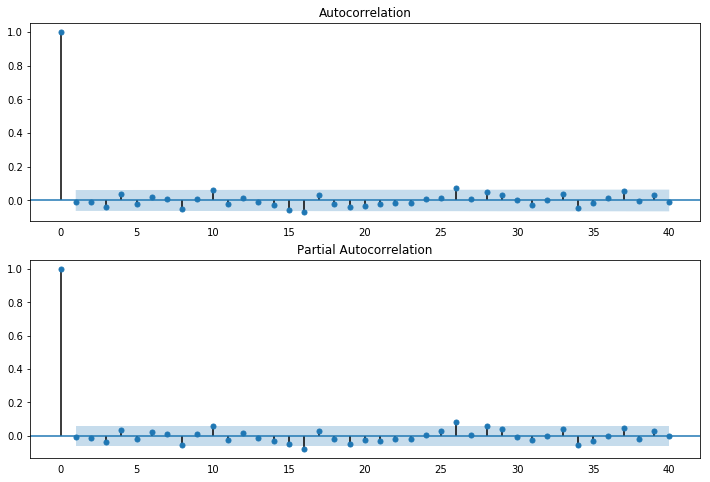

In [1392]:
n = 1000
theta = 0.1
sig2 = 0.1
sig = np.sqrt(sig2)
y = np.random.normal(mu, sig, n)

dy = pd.DataFrame(y)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

**Consider the MA(1) process:** 

$y_t = \varepsilon_t - \theta \varepsilon_{t-1}, \varepsilon_t \sim N(0,\sigma^2)$. 

- The mean: $\mu = E[\varepsilon_t]-\theta E[\varepsilon_{t-1}] = 0$. 

- The variance: $var(y_t) = var(\varepsilon_t - \theta \varepsilon_{t-1})=var(\varepsilon_t)- \theta^2 var(\varepsilon_{t-1})=\sigma^2 + \theta^2\sigma^2=(1+\theta^2)\sigma^2$

- The autocovariance function: 
\begin{eqnarray*}
\gamma_k &=& cov(y_{t+k},y_t) = cov(\varepsilon_{t+k} - \theta \varepsilon_{t-1+k},\varepsilon_t - \theta \varepsilon_{t-1}) \\ 
&=& cov(\varepsilon_{t+k},\varepsilon_t)+cov(\varepsilon_{t+k},-\theta \varepsilon_{t-1})\\
&+& cov(-\theta \varepsilon_{t-1+k},\varepsilon_t) + cov(-\theta \varepsilon_{t-1+k},-\theta \varepsilon_{t-1}) \\
&=& \delta_{k,0}\sigma^2+0-\theta\sigma^2\delta_{1,k}+\theta^2\sigma^2\delta_{k,0}
\end{eqnarray*}

Then we have $\gamma_0 = (1+\theta^2)\sigma^2$, $\gamma_1=-\theta\sigma^2$ and $\gamma_k = 0$ for $k>1$. The ACF is obviously $\rho_0 = 1$, $\rho_1=\frac{-\theta}{(1+\theta^2)}$ and $\rho_k = 0$ for $k>1$.


**Example:** 

Consider a MA(1) model with $\theta = 0.5$ and $\sigma^2=4$: $y_t = \varepsilon_t - 0.5\varepsilon_{t-1}$, $\varepsilon_j \sim N(0,4)$. 


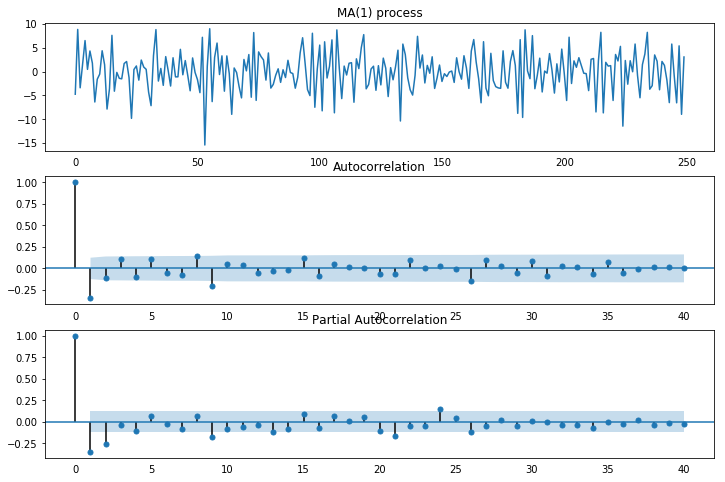

In [1393]:
from statsmodels.tsa.arima_process import ArmaProcess
arparams = np.array([1])
maparams = np.array([1, -0.5])
y = sm.tsa.arma_generate_sample(arparams, maparams, 250,sigma=4)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
plt.plot(y)
plt.title('MA(1) process')
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax2)
ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax3)

Theoretical values are $\mu = 0$, $\sigma_y= (1+0.5^2)*4=5$, $\gamma_0=\sigma_y=5$, $\gamma_1=-0.5*4=-2$, $\rho_0=1$, $\rho_1=\frac{-0.5}{(1+0.5^2)}=-0.4$.

The normalized ACF scales the ACF values by the zero-lag component: 

In [1394]:
from statsmodels.tsa.stattools import acf

acfmod = acf(y)

print('Mu real {} '.format(0))
print('Mu estimate {} '.format(y.mean()))

print('sigma real {} '.format(5))
print('sigma estimate {} '.format(y.std()))

print('rho0 real {} '.format(1))
print('ACF(0) estimate {} '.format(acfmod[0]))

print('rho1 real {} '.format(-0.4))
print('ACF(1) estimate {} '.format(acfmod[1]))

Mu real 0 
Mu estimate -0.009447094117974082 
sigma real 5 
sigma estimate 4.313464126364928 
rho0 real 1 
ACF(0) estimate 1.0 
rho1 real -0.4 
ACF(1) estimate -0.3495142307006841 


**Example: AR(1) model:**

$y_t = \phi y_{t-1} + \varepsilon_t , \varepsilon_t \sim N(0,\sigma^2)$. 

-The mean: $\mu = 0$. 

-The variance: $var(y_t) = \frac{\sigma^2}{1-\phi^2}$

- The autocovariance function: 
\begin{eqnarray*}
\gamma_0 &=& \frac{\sigma^2}{1-\phi^2} \\
\gamma_k &=& \phi \gamma_{k-1}, k=1 \dots \\
\gamma_k &=& \phi^k \frac{\sigma^2}{1-\phi^2}
\end{eqnarray*}

The ACF is obviously $\rho_k = \frac{\gamma_k}{\gamma_0} =\phi^k$.

**Example:** 

Consider a AR(1) model with $\phi = 0.5$ and $\sigma^2=1$: 

$y_t = y_{t-1} + \varepsilon_t , \varepsilon_t \sim N(0,1)$. 

Here we will have $\rho_k = (0.5)^k$, i.e. 
$\gamma_0=1$
$\gamma_1=0.4$
$\gamma_2=(0.4)^2$
$\gamma_3=(0.4)^3$

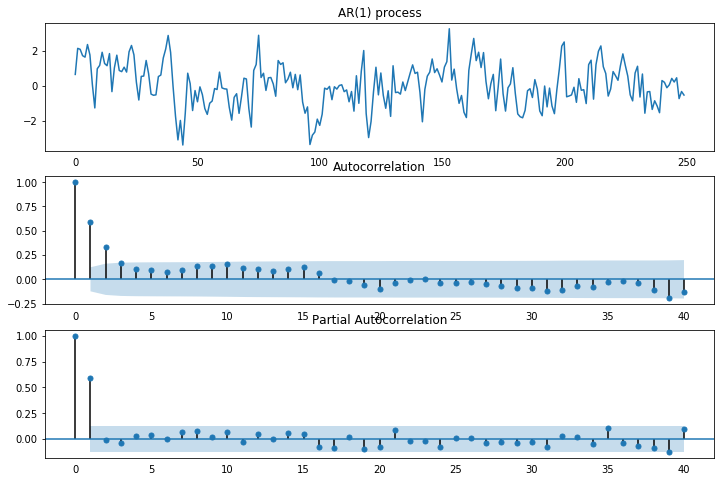

In [1396]:
from statsmodels.tsa.arima_process import ArmaProcess
arparams = np.array([1,-0.5])
maparams = np.array([1])
y = sm.tsa.arma_generate_sample(arparams, maparams, 250,sigma=1)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
plt.plot(y)
plt.title('AR(1) process')
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax2)
ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax3)

In [1397]:
from statsmodels.tsa.stattools import acf

acfmod = acf(y)

print('Mu real {} '.format(0))
print('Mu estimate {} '.format(y.mean()))

print('sigma real {} '.format(5))
print('sigma estimate {} '.format(y.std()))

print('rho0 real {} '.format(1))
print('ACF(0) estimate {} '.format(acfmod[0]))

print('rho1 real {} '.format(0.4**1))
print('ACF(1) estimate {} '.format(acfmod[1]))

print('rho2 real {} '.format(0.4**2))
print('ACF(2) estimate {} '.format(acfmod[2]))

print('rho3 real {} '.format(0.4**3))
print('ACF(3) estimate {} '.format(acfmod[3]))

Mu real 0 
Mu estimate 0.03081844135363905 
sigma real 5 
sigma estimate 1.2244141469458791 
rho0 real 1 
ACF(0) estimate 1.0 
rho1 real 0.4 
ACF(1) estimate 0.585860916413156 
rho2 real 0.16000000000000003 
ACF(2) estimate 0.33743887085965746 
rho3 real 0.06400000000000002 
ACF(3) estimate 0.17202377632040558 


**Example:** 

Consider a AR(2) model with $\phi_1 = 1.5$, $\phi_2 = 0.75 $ and $\sigma^2=1$: 

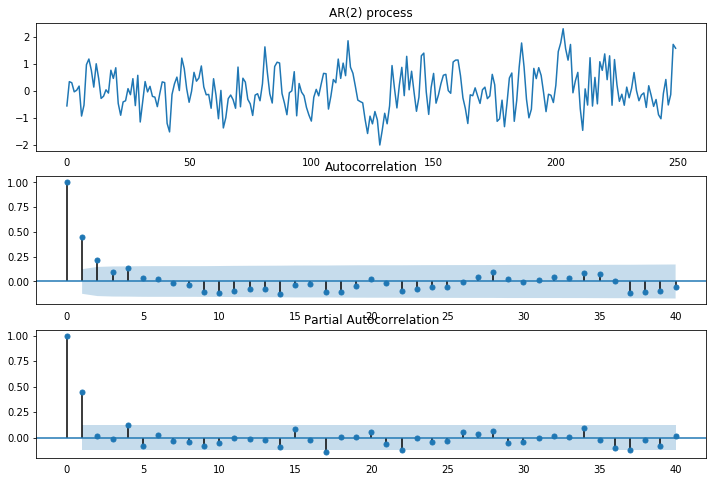

In [1398]:
from statsmodels.tsa.arima_process import ArmaProcess
arparams = np.array([1.5, -0.75])
maparams = np.array([1])
y = sm.tsa.arma_generate_sample(arparams, maparams, 250,sigma=1)


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
plt.plot(y)
plt.title('AR(2) process')
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax2)
ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax3)


In [1399]:
print('sigma_y = {}'.format(np.std(y)))

sigma_y = 0.7422005507662219


**Residual Analysis in time series:**

Fit a model then analize residuals. 

Example: 

Consider the model $y_t = \mu + \varepsilon_t$, $\varepsilon \sim N(0,\sigma)$. 


We can estimate the model parameter $\mu$ from a sample $\{y_1,\dots,y_n\}$ using the Maximum-Likelihood estimate 

$\hat{\mu} = \bar{y} = \frac{1}{n}\sum_{j=1}^n y_i$. 

Since $\bar{\varepsilon_t}=0$, we have $\hat{y}=\hat{\mu}$.

The residual $\hat{\varepsilon_t} = y_t - \hat{\mu}$ predicts the unobserved stochastic component of a model $\varepsilon_t$.

If we fit artificial data from a gaussian process and assume that it is a gaussian process: 

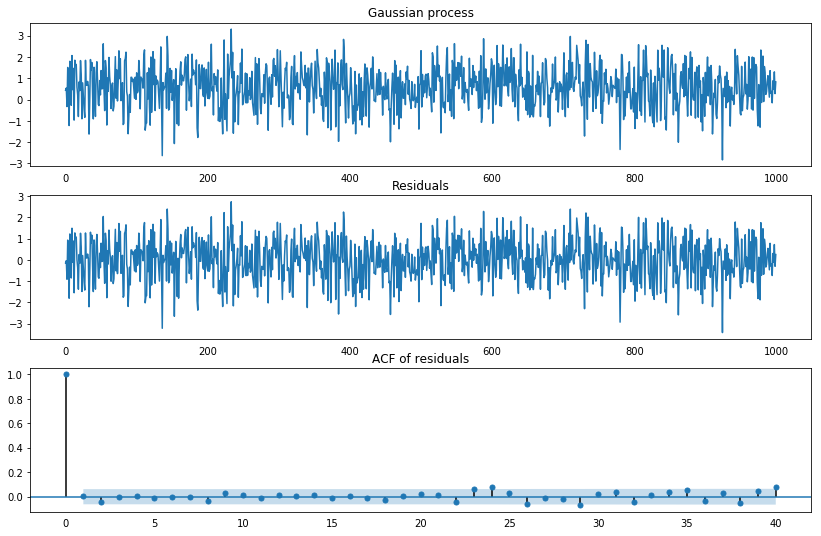

In [1400]:
n = 1000
mu = 0.6
sig2 = 1.0
sig = np.sqrt(sig2)
y = np.random.normal(mu, sig, n)

residual = y-y.mean()

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(311)
plt.plot(y)
ax.set_title("Gaussian process")
ax1 = fig.add_subplot(312)
plt.plot(residual)
ax1.set_title("Residuals")
ax2 = fig.add_subplot(313)
sm.graphics.tsa.plot_acf(residual, lags=40, ax=ax2)
ax2.set_title("ACF of residuals")
plt.show()

Generate artificial data from an AR(1) process and get the ACF of the residuals assuming that the model is a gaussian process:

In [1401]:
from statsmodels.tsa.arima_process import arma_generate_sample

arparams = np.array([.95])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 250)
residual = y-y.mean()

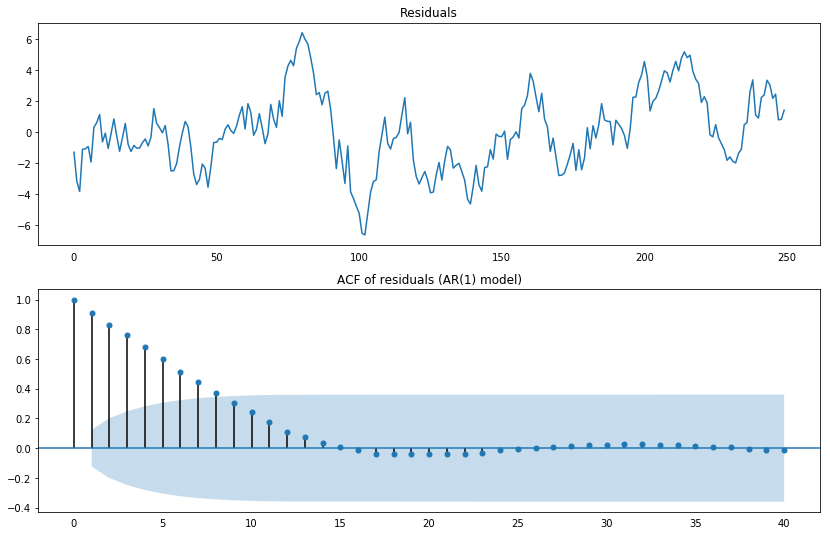

In [1402]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(211)
plt.plot(residual)
ax1.set_title("Residuals")
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_acf(residual, lags=40,ax=ax2)
ax2.set_title("ACF of residuals (AR(1) model)")
plt.show()

The model does not capture the complexity and correlation structure of the data. However, if we fit the AR(1) synthetic data with either an AR(1) or with ARMA(2,1) models, the residuals present no significant correlations. 

In [1403]:
model10 = sm.tsa.ARMA(y, (1, 0)).fit(trend='nc', disp=0)
model21 = sm.tsa.ARMA(y, (10, 1)).fit(trend='nc', disp=0)

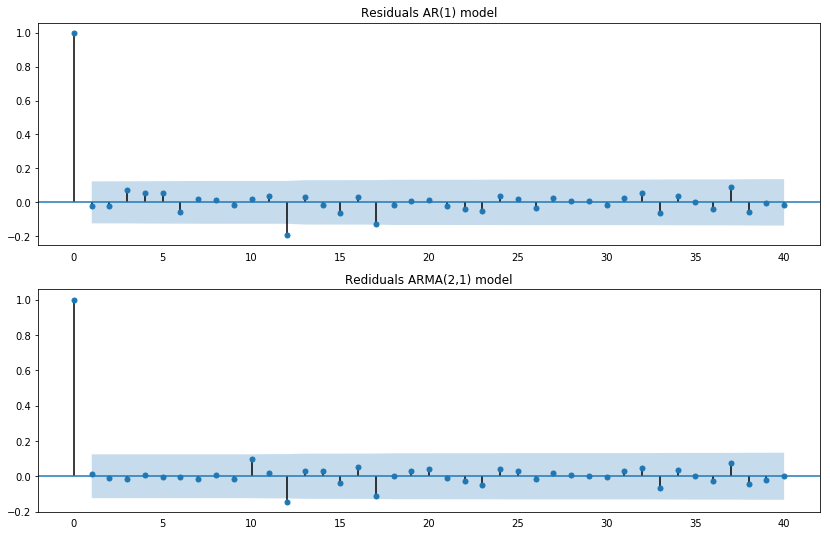

In [1404]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(model10.resid, lags=40,ax=ax1)
ax1.set_title("Residuals AR(1) model")
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_acf(model21.resid, lags=40,ax=ax2)
ax2.set_title("Rediduals ARMA(2,1) model")
plt.show()

### Spectral Analysis of time-series

Stationary processes:

Covariance stationary processesare time series, $y_t$, such
1. $E[y_t] = \mu$ for all t

2. $Var[yt] = \sigma^2$ for all t, $\sigma \lt \infty$

3. $Cov(yt,y_{t-\tau}) = \gamma(\tau)$ for all t and \tau

An example of a covariance stationary process is an i.i.d. sequence. The “identical
distribution” property means that the series has a constant mean and a constant variance.
The “independent” property means that $\gamma_0 = \sigma^2$, $\gamma(1)=\gamma(2)= \dots = 0$.


We define the **spectral density of a stationary process** from its covariance function $\gamma_k=Cov(y_y,y_{t-k})$ as 

$S(f) = \gamma_0 + 2 \sum_{k=1}^{\infty} \gamma_k cos(2\pi f k)$

where $\gamma_0 = Cov(y_y,y_t) = Var[y_t] = \sigma^2$ is the variance.  


Let's consider for instance a **White noise** process: 

$y_T = \varepsilon_t$, with $\varepsilon_t \sim N(0,\sigma^2)$. 

Since it satisfies the previous conditions is a stationary process and we have $\gamma_0=\sigma^2$ and $\gamma_k=0$ for $k \gt 0$. 

The spectral density for a gaussian process is constant for all frequencies. This is the reason why in physics we know the process as **white noise**:

$S(f) = \gamma_0 = \sigma^2$. 
 

**Spectral density for ARMA(p,q) processes:**

For a general ARMA(p,q) process we can express the spectral density in terms of the AR and MA characteristic polynomials:

$\Phi(x) = 1 - \phi_1 x - \phi_2 x^2 - \cdots - \phi_p x^p$

$\Theta(x) = 1 - \theta_1 x - \theta_2 x^2 - \cdots - \theta_q x^q$

as follows 

## $S(f) = \left|\frac{\Theta(e^{-2\pi i f})}{\Phi(e^{-2\pi i f})}\right|^2 \sigma^2$ 


**Example: Spectral density of an ARMA(1,1)**


    
Let's consider an ARMA(1,1) process with $\phi=0.5$ and $\theta=0.8$. In this case the spectral density has the form

## $S(f) = \frac{1+\theta^2 - 2\theta cos(2\pi f)}{1+\phi^2 - 2\phi cos(2\pi f)} \sigma^2$ 

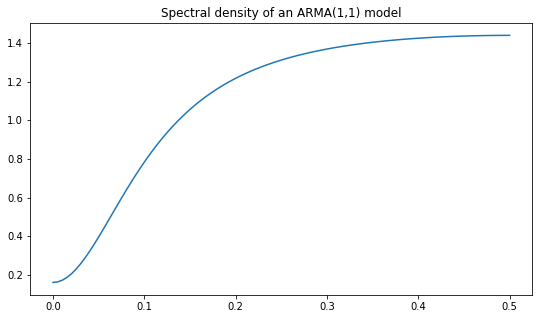

In [48]:
frange = np.linspace(0,0.5,100)
sig2 = 1
theta = 0.8
phi = 0.5

def spectarma11(x,theta,phi,sig2): 
    num = 1+theta**2-2*theta*np.cos(2*np.pi*x)
    den = 1+phi**2-2*phi*np.cos(2*np.pi*x)
    return (num/den)*sig2

s = np.zeros(frange.shape[0])
for k in np.arange(len(frange)):
    s[k] = spectarma11(f[k],theta=theta,phi=phi,sig2=1)

fig = plt.figure(figsize=(9, 5))
plt.plot(f,s)
plt.title("Spectral density of an ARMA(1,1) model")
plt.show()  

Simulate the process and compute the sample spectral density 


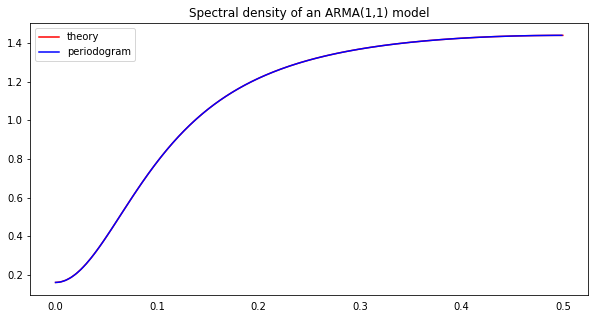

In [1477]:
from statsmodels.tsa.arima_process import ArmaProcess,arma_periodogram
arparams = np.array([phi])
maparams = np.array([theta])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, -maparams] # add zero-lag

w, p = arma_periodogram(ar, ma, worN=None, whole=0) #w is normalized frequency in rad/s
wn = w/(2*np.pi) # normalized frequency in Hz
factor = (s[0]/p[0]) # scale factor (?)
fig = plt.figure(figsize=(10, 5))
plt.plot(f,s,color='r')
plt.plot(wn,factor*abs(p),color='b')
plt.legend(['theory','periodogram'])
plt.title("Spectral density of an ARMA(1,1) model")
plt.show() 

In [1473]:
print(s[0])
print(p[0])
print((1+theta**2-2*theta)/(1+phi**2 -2*phi))
print(s[0]/p[0])

print(s[-1]/p[-1])

0.16000000000000014
0.0638307648642292
0.16000000000000014
2.506628274631004
2.5066306048535956


Yo can always design a FIR filter and get the corresponding ARMA coefficients:


/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


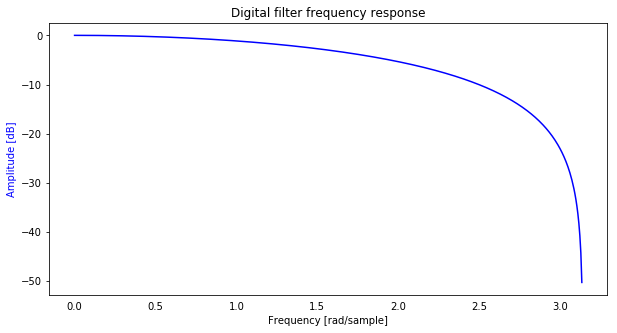

In [1433]:
from scipy import signal

#              jw               -jw               -jwM
#     jw    B(e  )  b[0] + b[1]e    + .... + b[M]e
#  H(e  ) = ---- = -----------------------------------
#              jw               -jw               -jwN
#           A(e  )  a[0] + a[1]e    + .... + a[N]e
               
fir_order = 2
b = signal.firwin(fir_order, 0.2)
w, h = signal.freqz(b)

fig = plt.figure(figsize=(10, 5))
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.show()

We can estimate the sample spectral density by computing the FFT of a simulation of the ARMA(1,1) model:

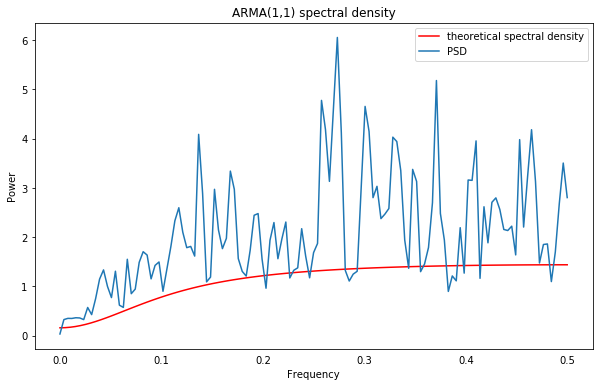

In [1416]:
from scipy import signal

arma_t = ArmaProcess(ar, ma)
y = arma_generate_sample(ar, ma, 1000)

freqs, psd = signal.welch(y)


plt.figure(figsize=(10, 6))
plt.plot(f,s,color='r')
plt.plot(freqs, psd)
plt.title('ARMA(1,1) spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(['theoretical spectral density','PSD'])
plt.show() 

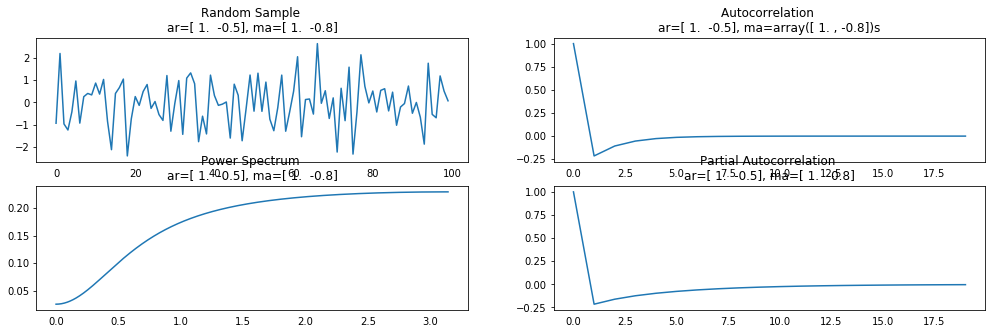

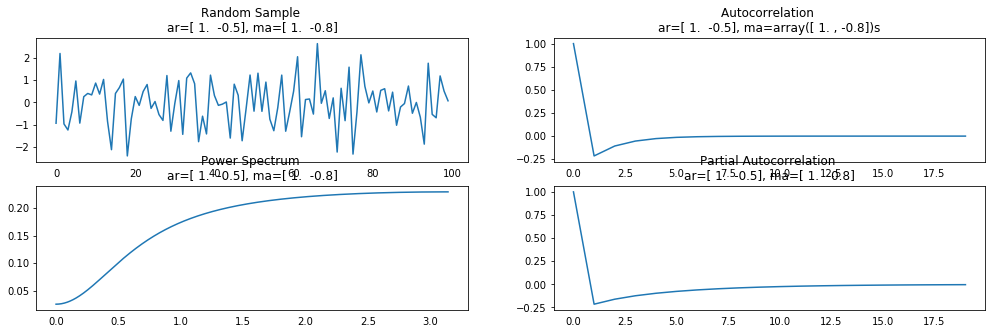

In [1418]:
from statsmodels.sandbox.tsa.fftarma import ArmaFft
zz = ArmaFft(ar, ma, 1000)
fig = plt.figure(figsize=(17, 5))
zz.plot4(fig=fig, nobs=100, nacf=20, nfreq=1000)

We can proceed in a similar way to characterize the frequency response of other autoregressive models:

# 4. Model selection and identification

How to choose the best model (type and order)?.

- Option 1 (correlation structure): Check ACF and PACF of the series to select AR orders, and
of the residuals to select MA lags.

- Option 2 (Parsimony principle): Compare a set of models and choose one using goodness vs. complexity (BIC, AIC indices).

We can compare different models $M_i$ bu minimizing {\bf Akaike's Information Criterion} (AIC):

\begin{equation*}
AIC = - 2 \log \mathcal{L}(\mathcal{D}|M_i)^\star + 2k
\end{equation*}

where $\mathcal{L}(\mathcal{D}|M_i)^\star$ is the maximum likelihood of model $M_i$ given data $\mathcal{D}$ and $k$ the number of parameters of the model. 


**Example: Model selection for artificial ARMA(2,1) process:**

Let's generate artificial data from an ARMA(2,1) stochastic process: 

In [1422]:
arparams = np.array([1.6 -0.94])
maparams = np.array([0.94])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, -maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 1000)


Fit different models: 

In [1423]:
model10 = sm.tsa.ARMA(y, (1, 0)).fit(trend='nc', disp=0)
model20 = sm.tsa.ARMA(y, (2, 0)).fit(trend='nc', disp=0)
model30 = sm.tsa.ARMA(y, (3, 0)).fit(trend='nc', disp=0)
model01 = sm.tsa.ARMA(y, (0, 1)).fit(trend='nc', disp=0)
model02 = sm.tsa.ARMA(y, (0, 2)).fit(trend='nc', disp=0)
model03 = sm.tsa.ARMA(y, (0, 3)).fit(trend='nc', disp=0)
model21 = sm.tsa.ARMA(y,(2, 1)).fit(trend='nc', disp=0)
model31 = sm.tsa.ARMA(y, (3, 1)).fit(trend='nc', disp=0)

In [1424]:
aics = np.array([model10.aic, model20.aic,model30.aic,model01.aic,model02.aic,model03.aic,model21.aic,model31.aic])
bics = np.array([model10.bic, model20.bic,model30.bic,model01.bic,model02.bic,model03.bic,model21.bic,model31.bic])


In [1425]:
df = pd.DataFrame(np.c_[aics,bics])
df.columns = ["AIC","BIC"]
df.index = ["ARMA(1,0)","ARMA(2,0)","ARMA(3,0)","ARMA(0,1)","ARMA(0,2)","ARMA(0,3)","ARMA(2,1)","ARMA(3,1)"]
df

,AIC,BIC
"ARMA(1,0)",2966.096557,2975.912068
"ARMA(2,0)",2955.370537,2970.093803
"ARMA(3,0)",2939.597599,2959.228621
"ARMA(0,1)",2958.378475,2968.193986
"ARMA(0,2)",2934.301224,2949.024489
"ARMA(0,3)",2899.840177,2919.471199
"ARMA(2,1)",2868.876188,2888.507209
"ARMA(3,1)",2870.198937,2894.737714


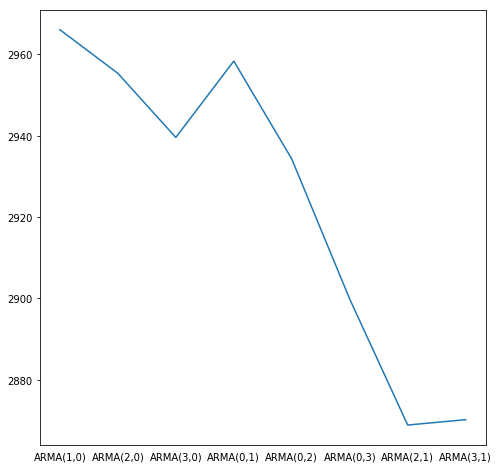

In [1426]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
plt.plot(df.AIC)
plt.xticks(ind, ("ARMA(1,0)","ARMA(2,0)","ARMA(3,0)","ARMA(0,1)","ARMA(0,2)","ARMA(0,3)","ARMA(2,1)","ARMA(3,1)"))
plt.show()

Inspection of the parameters of each model: Look for parameters that are close to zero indicating overfitting 


In [1427]:
params = np.array([model10.params.round(4), model20.params.round(4),model30.params.round(4),model01.params.round(4),
                   model02.params.round(4),model03.params.round(4),model21.params.round(4),model31.params.round(4)])
dfp = pd.DataFrame(params)
dfp.index = ["ARMA(1,0)","ARMA(2,0)","ARMA(3,0)","ARMA(0,1)","ARMA(0,2)","ARMA(0,3)","ARMA(2,1)","ARMA(3,1)"]


In [1428]:
dfp

,0
"ARMA(1,0)",[-0.1512]
"ARMA(2,0)","[-0.1683, -0.1125]"
"ARMA(3,0)","[-0.1832, -0.1351, -0.1328]"
"ARMA(0,1)",[-0.2079]
"ARMA(0,2)","[-0.2443, -0.1926]"
"ARMA(0,3)","[-0.2676, -0.2107, -0.2109]"
"ARMA(2,1)","[0.6858, -0.0041, -0.9495]"
"ARMA(3,1)","[0.6819, 0.0118, -0.0274, -0.9457]"


In [1429]:
import numpy as np
arparams = np.array([1.5 -0.75])
maparams = np.array([0.75])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, -maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
model = sm.tsa.ARMA(y, (2, 1)).fit(trend='nc', disp=0)
model.params

array([-0.74258494,  0.10014728,  0.77991371])

# 5. Analysis of non-stationary, non-linear time-series

Non-stationary time-series: ARIMA and GARCH


### ARIMA MODELS ARIMA(p,d,q): 

An ARIMA(p,d,q) includes the following ingredients: 

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.


In [1809]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 

dta = sm.datasets.sunspots.load_pandas().data

mod101 = ARIMA(dta["SUNACTIVITY"].values, order=(1,0,1))
results101 = mod101.fit(disp=0)

mod111 = ARIMA(dta["SUNACTIVITY"].values, order=(1,1,1))
results111 = mod111.fit(disp=0)


In [1812]:
results101.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 2739.4321
Dependent Variable: D.y              Log-Likelihood:      -1358.3  
Date:               2019-07-06 20:28 Scale:               1.0000   
No. Observations:   308              Method:              css-mle  
Df Model:           3                Sample:              1        
Df Residuals:       305                                   9        
Converged:          1.0000           S.D. of innovations: 19.893   
No. Iterations:     17.0000          HQIC:                2730.478 
AIC:                2724.5117                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.0014     2.2984   -0.0006   0.9995   -4.5062   4.5035
ar.L1.D.y     0.4078     0.0750    5.4395   0.0000    0.2608   0.5547
ma.L1.D.y     0.2042     0.0705    2.8981   0.0040    0.0661   0.3423
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           2.4523             0.0000           2.4523             0.0000
MA.1          -4.8968             0.0000           4.8968             0.5000
===================================================================

"""

In [1813]:
results111.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 2739.4321
Dependent Variable: D.y              Log-Likelihood:      -1358.3  
Date:               2019-07-06 20:29 Scale:               1.0000   
No. Observations:   308              Method:              css-mle  
Df Model:           3                Sample:              1        
Df Residuals:       305                                   9        
Converged:          1.0000           S.D. of innovations: 19.893   
No. Iterations:     17.0000          HQIC:                2730.478 
AIC:                2724.5117                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.0014     2.2984   -0.0006   0.9995   -4.5062   4.5035
ar.L1.D.y     0.4078     0.0750    5.4395   0.0000    0.2608   0.5547
ma.L1.D.y     0.2042     0.0705    2.8981   0.0040    0.0661   0.3423
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           2.4523             0.0000           2.4523             0.0000
MA.1          -4.8968             0.0000           4.8968             0.5000
===================================================================

"""

Shannon's entropy and mutual information

**Shannon's entropy and information of a signal**

Entropy is a measure of the disorder of a system: 

Boltzmann's entropy equation $S = k_B \log W$ where $k_B = 1.3807 \times 10^{-23}$ J/K is the Boltzmann's constant and $W$ is the number of dynamical configutations of the systems (complexions). 


Shannon's entropy:
We define a set of symbols ${a_0,a_1,\dots,a_n}$ with a probability of occurence in a certain message given by ${p_0,p_1,\dots,p_n}$. 

For instance, in a sequence of coin tossings we will have two possible outcomes of the coin ${a_0,a_1}$ with $a_0 = \text{head}$ and  $a_1 = \text{tail}$. If the coin is fair, the probability of heads and tails is equal and therefore we have $p_0 = p_1 = \frac{1}{2}$. A message in this context consists in a sequence of coin tossing outcomes, for instance ${a_0,a_0,a_1,a_0,a_1,a_1}$. 



$-\log p_i$ is the level of 'surprise' of the outcome: If $p_i$ is low, then the surprise of an outcome $a_i$ is high. For a fair coin, the surpise is 
Similarily, in a digigal message we have  

In [1517]:
p_0 = 0.5
- np.log(p_0)

0.6931471805599453

If the coin is not fair ahd the probability of heads $p_0 = 0.1$, the associated 'surprise' of getting a head is higher:  

In [1518]:
p_0 = 0.1
- np.log(p_0)

2.3025850929940455

We can weight the suprise of an outcome by its probability and define the 'weighted surprise' as $p_i \log p_i$. 
Both outcomes with a high surprise that occur very rarely or outcomes with a low surprise that ocurr very often present a low value of $p_i \log p_i$:

In [1519]:
p_0 = 0.001
I1 = - p_0*np.log(p_0)
p_0 = 0.999
I2= - p_0*np.log(p_0)

print('High surprise but rare outcome= {}'.format(I1))
print('Low surprise but common outcome= {}'.format(I2))

High surprise but rare outcome= 0.006907755278982137
Low surprise but common outcome= 0.0009994998332499509


Events with a balance between ocurrence and surprise will maximize the value of $p_i \log p_i$:

In [1520]:
p_0 = 0.5
I3 = - p_0*np.log(p_0)
print('Normal outcome= {}'.format(I3))

Normal outcome= 0.34657359027997264


Shannon's entroy is defined as the sum of all the weighted surpirses of all the possible outcomes of a system

## $H = -\sum_{i=1}^n p_i \log(p_i)$

In a fair coin all the outcomes are hardly predictible and the correspoding entropy is high. 
In an unfair coin the outcomes are highly predictible and the correspoding entropy is low. 

In [1521]:
# Fair coin: 
p_0 = 0.5
p_1 = 0.5 
H_fair = - p_0*np.log(p_0)- p_1*np.log(p_1)

# Fair coin: 
p_0 = 0.1
p_1 = 0.9 
H_unfair = - p_0*np.log(p_0)- p_1*np.log(p_1)

print('Entropy Fair coin= {}'.format(H_fair))
print('Entropy Unfair coin= {}'.format(H_unfair))

Entropy Fair coin= 0.6931471805599453
Entropy Unfair coin= 0.3250829733914482


If we define entropy using $\log_2$ the uints are in bits/symbol and it is a measure of the number of bits needed in order to encode the sequence: The higher the entropy the larger the number of bits needed. 

## $H = -\sum_{i=1}^n p_i \log_2(p_i)$

In [1522]:
# Fair coin: 
p_0 = 0.5
p_1 = 0.5 
H_fair = - p_0*np.log2(p_0)- p_1*np.log2(p_1)

# Fair coin: 
p_0 = 0.1
p_1 = 0.9 
H_unfair = - p_0*np.log2(p_0)- p_1*np.log2(p_1)

print('Entropy Fair coin (bits/symbol)= {}'.format(H_fair))
print('Entropy Unfair coin (bits/symbol)= {}'.format(H_unfair))

Entropy Fair coin (bits/symbol)= 1.0
Entropy Unfair coin (bits/symbol)= 0.4689955935892812


The entropy of a fair coin is maximal since the outcome can not be predicted. 1 bit per symbol in the sequence is needed in order to encode the message. A sequence with N coin tosses requires N bits in order to be encoded. In the unfair coin with $p_0=0.1$, only $0.47$ bits are required per symbol, so a sequence of N coin tosses can be compressed and encoded with only $0.47N$ bits. 

As we sweep over the unfairness $p_0$ we get: 

In [1643]:
H = - p_0*np.log2(p_0)- p_1*np.log2(p_1)

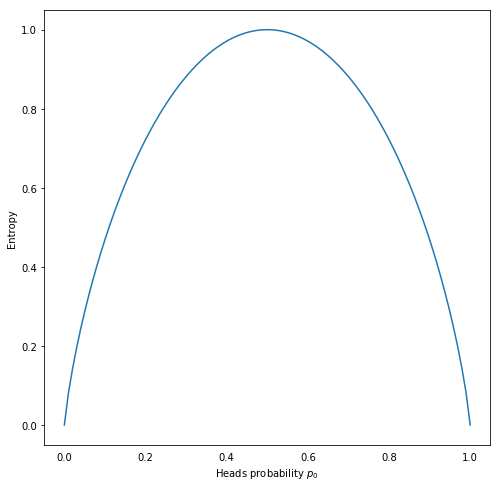

In [1716]:
eps = 1e-16
p0 = np.linspace(eps,1-eps,100)
H = - p0*np.log2(p0)-(1-p0)*np.log2((1-p0))
fig = plt.figure(figsize=(8,8))
plt.plot(p0,H)
plt.ylabel('Entropy')
plt.xlabel('Heads probability $p_0$')
plt.show()

Entropy of a digital signal:

Consider a digital signal witha level discretization of 8 bits. 

A digital signal can be considered as a sequence of values in a certain discretized range of levels. A n-bit digital signal has $2^n-1$ possible amplitude levls. Therefore, a signal is equivalent to a message in which the symbols correspond to each of the possible amplitude levels. If the signal is large the probabilities of occurrence of the levels can be estimated from the nortmalized histogram of the signal. From the probabilities we can easily compute the entropy using $H = -\sum_{i=1}^n p_i \log_2(p_i)$. 

**Example: Consider a white noise signal and a sinusoidal signal: **


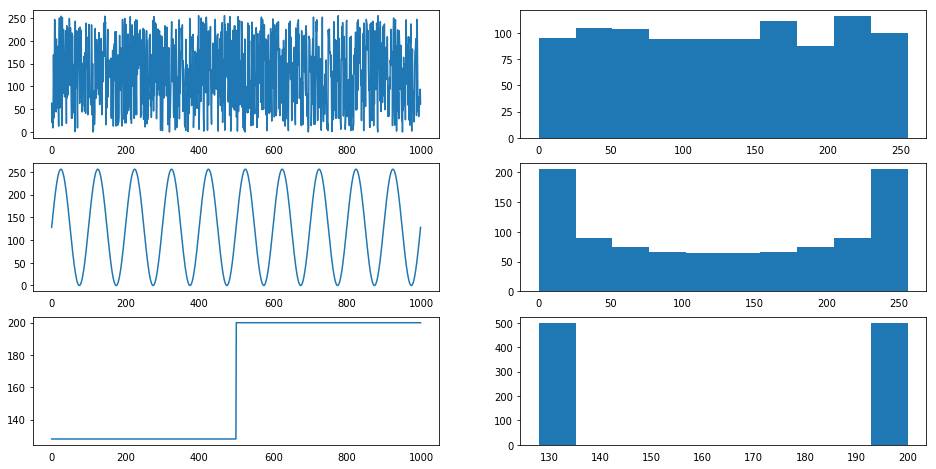

In [1773]:
n=1000
# Gaussian noise: 
yg = np.random.randint(256, size=n)
# sinusoidal signal
t = np.linspace(0,1,n)
w = 10
ys = 128+128*np.sin(2*np.pi*w*t)
# step signal:
yst = np.concatenate((128*np.ones(round(n/2)),200*np.ones(round(n/2))),axis=0)
            
probg,edges = np.histogram(yg,bins=np.arange(256), density=True)
probs,edges  = np.histogram(ys,bins=np.arange(256), density=True)
probst,edges  = np.histogram(yst,bins=np.arange(256), density=True)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(321)
plt.plot(yg)
fig.add_subplot(322)
plt.hist(yg)
fig.add_subplot(323)
plt.plot(ys)
fig.add_subplot(324)
plt.hist(ys)
fig.add_subplot(325)
plt.plot(yst)
fig.add_subplot(326)
plt.hist(yst)
plt.show()

In [1774]:
probg.sum() # check normalization of probabilities

1.0

The gaussian noise and the sinusoidal signal present an approximately uniform occurrence of the amplitude levels and therefore present high entropy near 8 bits/level. In the case of the step signal, only two levels are present and therefore the information content is low and signal can be compressed using just 1 bit per symbol:

In [1775]:
probg = probg + eps
H_noise = -np.sum(probg * np.log2(probg), axis=0)
probs = probs + eps
H_signal = -np.sum(probs * np.log2(probs), axis=0)
probst = probst + eps
H_step = -np.sum(probst * np.log2(probst), axis=0)

print('Entropy of noise H = {} bits/symbol'.format(H_noise))
print('Entropy of signal H = {} bits/symbol'.format(H_signal))
print('Entropy of step H = {} bits/symbol'.format(H_step))

Entropy of noise H = 7.795695491669498 bits/symbol
Entropy of signal H = 7.742889058316474 bits/symbol
Entropy of step H = 1.0000000000013447 bits/symbol


### Mutual information $I(x,y)$:

$I(x,y) = \sum_{x,y} p(x,y) \ln {{p(x,y)}\over{p(x)\cdot p(y)}}$

If signals $x$ and $y$ are independent, the conditional probability can be factorized as $p(x,y) = p(x)\cdot p(y)$ and in this case we have 

$I(x,y) = \sum_{x,y} p(x)\cdot p(y) \ln {{p(x) p(y)}\over{p(x) \cdot p(y)}} = \sum_{x,y} p(x) \cdot p(y) \cdot \ln{1} = 0$



In [1777]:
from sklearn.metrics.cluster import normalized_mutual_info_score
I1 = normalized_mutual_info_score(yg, yg)
I2 = normalized_mutual_info_score(yg, 10+20*yg)
I3 = normalized_mutual_info_score(yg, ys)
I4 = normalized_mutual_info_score(yg, yst)
I4

0.08289658562505381